# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# Predictive maintenance 

In this project, we want to do predictive maintenance for the faults prediction on air conditioning equipment installed in mobile network transmission sites in a 14-days forecast window. 
we have the information on **weather conditions** (past and forecast), **alarms** and **faults** that occurred on-site, **static features** of the site.

The feature distribution is in a period of 14, 7, 3 days. 

This project consists of 5 main parts. 
1- We applied the libraries to eas the work during the process.

2- During our project, there are some repeated jobs that we have to do. We made a function from them and put them all together with their definitions and use cases.

3- Data preprocessing: data is not always clean and ready to be fed to the model so, we need to do some data preprocessing to better prepare the data for the model. This part consists of 6 main steps. 

3.1- Loading the data: The data is in the form of CSV. For reading this file, we used pandas which, can be loaded as a data frame. The reason is that data frames are power full and can give us a lot of leverages. 

3.2- Data quality assurance: After loading the data, we should be sure the quality of the data is the best. 

3.2.1- Null and missing values. If we have missing or NaN values we should replace is or delete them. If the number of them is high we will try to impute them.

3.2.2- Inconsistent Values:  the inconsistency analysis is important. Because we can understand if we have unrelated values. For example, if we have a string in a column that should be integers or have outliers. 

3.2.3- Duplicates and unimportant columns: we should find the duplicate values because duplicates can be misleading and bias our performance. Also, some columns are not important for the model so we drop them in this section.

3.3- Data visualization: we should plot our data to visualize better everything and decide how we can proceed

3.4- Outlier detection: after visualizing the data we now have a sense of how we can delete outliers. 

3.5- Feature aggregation: some features are highly correlated we should aggregate and drop the rest

3.6- Feature sampling: using a baseline performance we can compare the different sampling models to even better simplify our data 

4- Model Evaluation: in this part we will do a model evaluation using a grid search to select the best models with the best hyper parameters 

5- Recal Prediction: We will calculate the weighted recall

# 1- Libraries
apply the desired libraries 

In [213]:
import pandas as pd
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor


# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Feature Selection 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform

# <pde;s
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors

# 2- Functions
Defin the functions that we will use through out our code.

print all the datas: To avoid trimming sometimes we used this to see all the data.

In [138]:
def print_all (to_print):
#     specifies the oprions for printing
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(to_print)

print the number of columns without any outliers

In [139]:
def print_clean_col(X_in,mean,std):
    lower = mean - 3*std
    upper = mean + 3*std
    i=0
    for col in X_in.columns:
        outliers = ((X_in[col]>upper[col]) | (X_in[col]<lower[col])).astype(int)
        
        if (outliers.sum()>0):
            print("Variable %s (%.3f,%.3f) has %d outliers"%(col,mean[col],std[col],outliers.sum()))
        else:
            i+=1
    print('the number of cleaned columns are ', i)

Replace outliers with their upper or lower bound in a gussian like distribution

In [140]:
def replace_outliers(S,mean,std):
#     copy of the original data frame
    X = S.copy()
#     lower bound and upper bound
    lower = mean - 3*std
    upper = mean + 3*std
    for col in X.columns:
        X.loc[X[col]>upper[col], col] = upper[col]
        X.loc[X[col]<lower[col], col] = lower[col]
    
    return X

sort numerical values 

In [141]:
# sort Numerical values function
def sorted_m3_numerical_values(numerical_df, reverse = True):
    sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=reverse), axis=1)
    sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
    New_Numerical_columns_list = []
    for column in sorted_Numerical_columns_list:
        New_column = column.replace('_',' ')
        New_Numerical_columns_list.append(New_column)

    New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

    sorted_Numerical_columns_list.clear()
    for column in New_Numerical_columns_list:
        New_column = column.replace(' ','_')
        sorted_Numerical_columns_list.append(New_column)

    #drop the dataframe
    sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]

    sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
    return sorted_Numerical_df


This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not

In [142]:
# This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not
def compare_corr_values(corr, df_):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= 0.84:
              if columns[j]:
                  columns[j] = False
  selected_columns = df_.columns[columns]
  df_ = df_[selected_columns]
  return df_

This method normalize a data set. it can return a `Numpy` *array* if set `return_df` to `True` a dataframe on default. Also it can do 2 types of normalization you can set `is_standard` to `False` so you can have `MinMaxScaler`, or `StandardScaler` by default.

In [143]:
def normalizer_df(df, return_df = False, is_standard = True, range_to_put = (-1, 1)):
    df = df.copy()
    st_x= StandardScaler()
    norm_x = MinMaxScaler(feature_range = range_to_put)
    if is_standard:
        if return_df:
            df[df.columns] = st_x.fit_transform(df[df.columns])
            return df
        else:
            return st_x.fit_transform(df)
    else:
        if return_df:
            df[df.columns] = norm_x.fit_transform(df[df.columns])
            return df
        else:
            return norm_x.fit_transform(df)

This method helps up to evaluate a baseline performance. it takes a model and inputs and outputs and provides us with a metric

In [144]:
def evaluate_model_baseLine(model, X_in,y_in):
    variance_model = LogisticRegression()
    variance_scores = cross_val_score(model, X_in, y_in, cv=kfolds)
    print("Variance Model R2 Mean %.3f StdDev %.3f"%(variance_scores.mean(),variance_scores.std()))

In [128]:
def replace_skwurt_outliers(transform_df , is_skew):
    X = transform_df.copy()
    if is_skew == False:
        lower, upper = -10, +10
        for col in X.columns:
            X.loc[X[col]>upper, col] = upper
            X.loc[X[col]<lower, col] = lower
    else:
        lower, upper = -3, +3
    for col in X.columns:
        X.loc[X[col]>upper, col] = upper
        X.loc[X[col]<lower, col] = lower
    return X

# 3- Preprocessing
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

## 3.1- loading the data

`Notice` google drive 

In [146]:
# Loading the DATA  for Daniel, 
#Don't use it if you don't want to mount your google drive with google colab
# from google.colab import drive
# drive.mount('/content/drive',force_remount=Truimport os 
# cwd = os.getcwd()
# dataset_dir = os.path.join(cwd, 'DMTMDataset')
# #train_df=pd.read_csv(os.path.join(dataset_dir,'train.csv'))
# dataset_direction='/content/drive/MyDrive/DMTMDataset/'
# train_df=open(os.path.join(dataset_direction,'train.csv'))
# df=pd.read_csv((train_df))
# dfe)


In [139]:
df = pd.read_csv('test.csv')

## 3.2- Data Quality assurnace 
we should check for:

### 3.2.1- Null and missing values 

In [149]:
# check for the null 
df.isnull().sum().sum()

0

we see that there are no NaN values

### 3.2.2- Inconsistant Values 

In [150]:
print_all(df.dtypes)

SITE_ID                                  int64
DATE                                    object
CELL_TYPE_Macro                          int64
CELL_TYPE_Mobil                          int64
CELL_TYPE_TRP                            int64
CELL_TYPE_Tx site                        int64
CELL_TYPE_micro                          int64
N_TRANSPORTED_SITES                    float64
GEOGRAPHIC_CLUSTER_K_0                   int64
GEOGRAPHIC_CLUSTER_K_1                   int64
GEOGRAPHIC_CLUSTER_K_2                   int64
GEOGRAPHIC_CLUSTER_K_3                   int64
GEOGRAPHIC_CLUSTER_K_4                   int64
GEOGRAPHIC_CLUSTER_K_5                   int64
GEOGRAPHIC_CLUSTER_K_6                   int64
GEOGRAPHIC_CLUSTER_K_7                   int64
GEOGRAPHIC_CLUSTER_K_8                   int64
GEOGRAPHIC_CLUSTER_K_9                   int64
aircon_sum_wo_prev7d                   float64
aircon_sum_wo_prev14d                  float64
aircon_sum_target_next14d                int64
mean_temperat

In [132]:
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

we want to check if the data inside a column are all from the same type and we don't have irrelevant values

In [152]:
col_max = df.max(axis=0)

In [153]:
col_min = df.min(axis=0)

In [154]:
df_range = col_max - col_min

In [133]:
df.shape

(621300, 134)

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [156]:
print_all(df_range.sort_values())

CELL_TYPE_TRP                              0.00
CELL_TYPE_Macro                            1.00
aircon_sum_target_next14d                  1.00
GEOGRAPHIC_CLUSTER_K_9                     1.00
GEOGRAPHIC_CLUSTER_K_8                     1.00
GEOGRAPHIC_CLUSTER_K_6                     1.00
GEOGRAPHIC_CLUSTER_K_5                     1.00
GEOGRAPHIC_CLUSTER_K_4                     1.00
GEOGRAPHIC_CLUSTER_K_3                     1.00
GEOGRAPHIC_CLUSTER_K_7                     1.00
GEOGRAPHIC_CLUSTER_K_1                     1.00
GEOGRAPHIC_CLUSTER_K_2                     1.00
CELL_TYPE_Tx site                          1.00
CELL_TYPE_micro                            1.00
CELL_TYPE_Mobil                            1.00
GEOGRAPHIC_CLUSTER_K_0                     1.00
skew_fire/smoke_alarms_prev14d             5.65
aircon_sum_wo_prev7d                       6.00
min_rain_mm_f_next14d                      7.60
skew_temperature_alarms_prev14d            7.61
aircon_sum_wo_prev14d                   

we see that the range and max and min of some cells all together are always zero so it is useless to have it in our datas so we drop it

In [157]:
# non_zero_keys = []
# for key in df_range.index:
#     value= df_range[key]
#     if value == 0:
#         df = df.drop(columns = [key])


Now we check for inconsistent values
First we take the range and variance for each column 

In [158]:
df.shape

(621300, 133)

from the statistics above we can understand that it is possible that we have outliers.

### 3.2.3- Duplicates and Unimportant columns removal

In [134]:
# remove the duplicates if any 
df = df.drop_duplicates()

In [135]:
df.shape

(520164, 134)

## 3.3- Data visualization

In here first we try to visualize our data and understand better their distribution

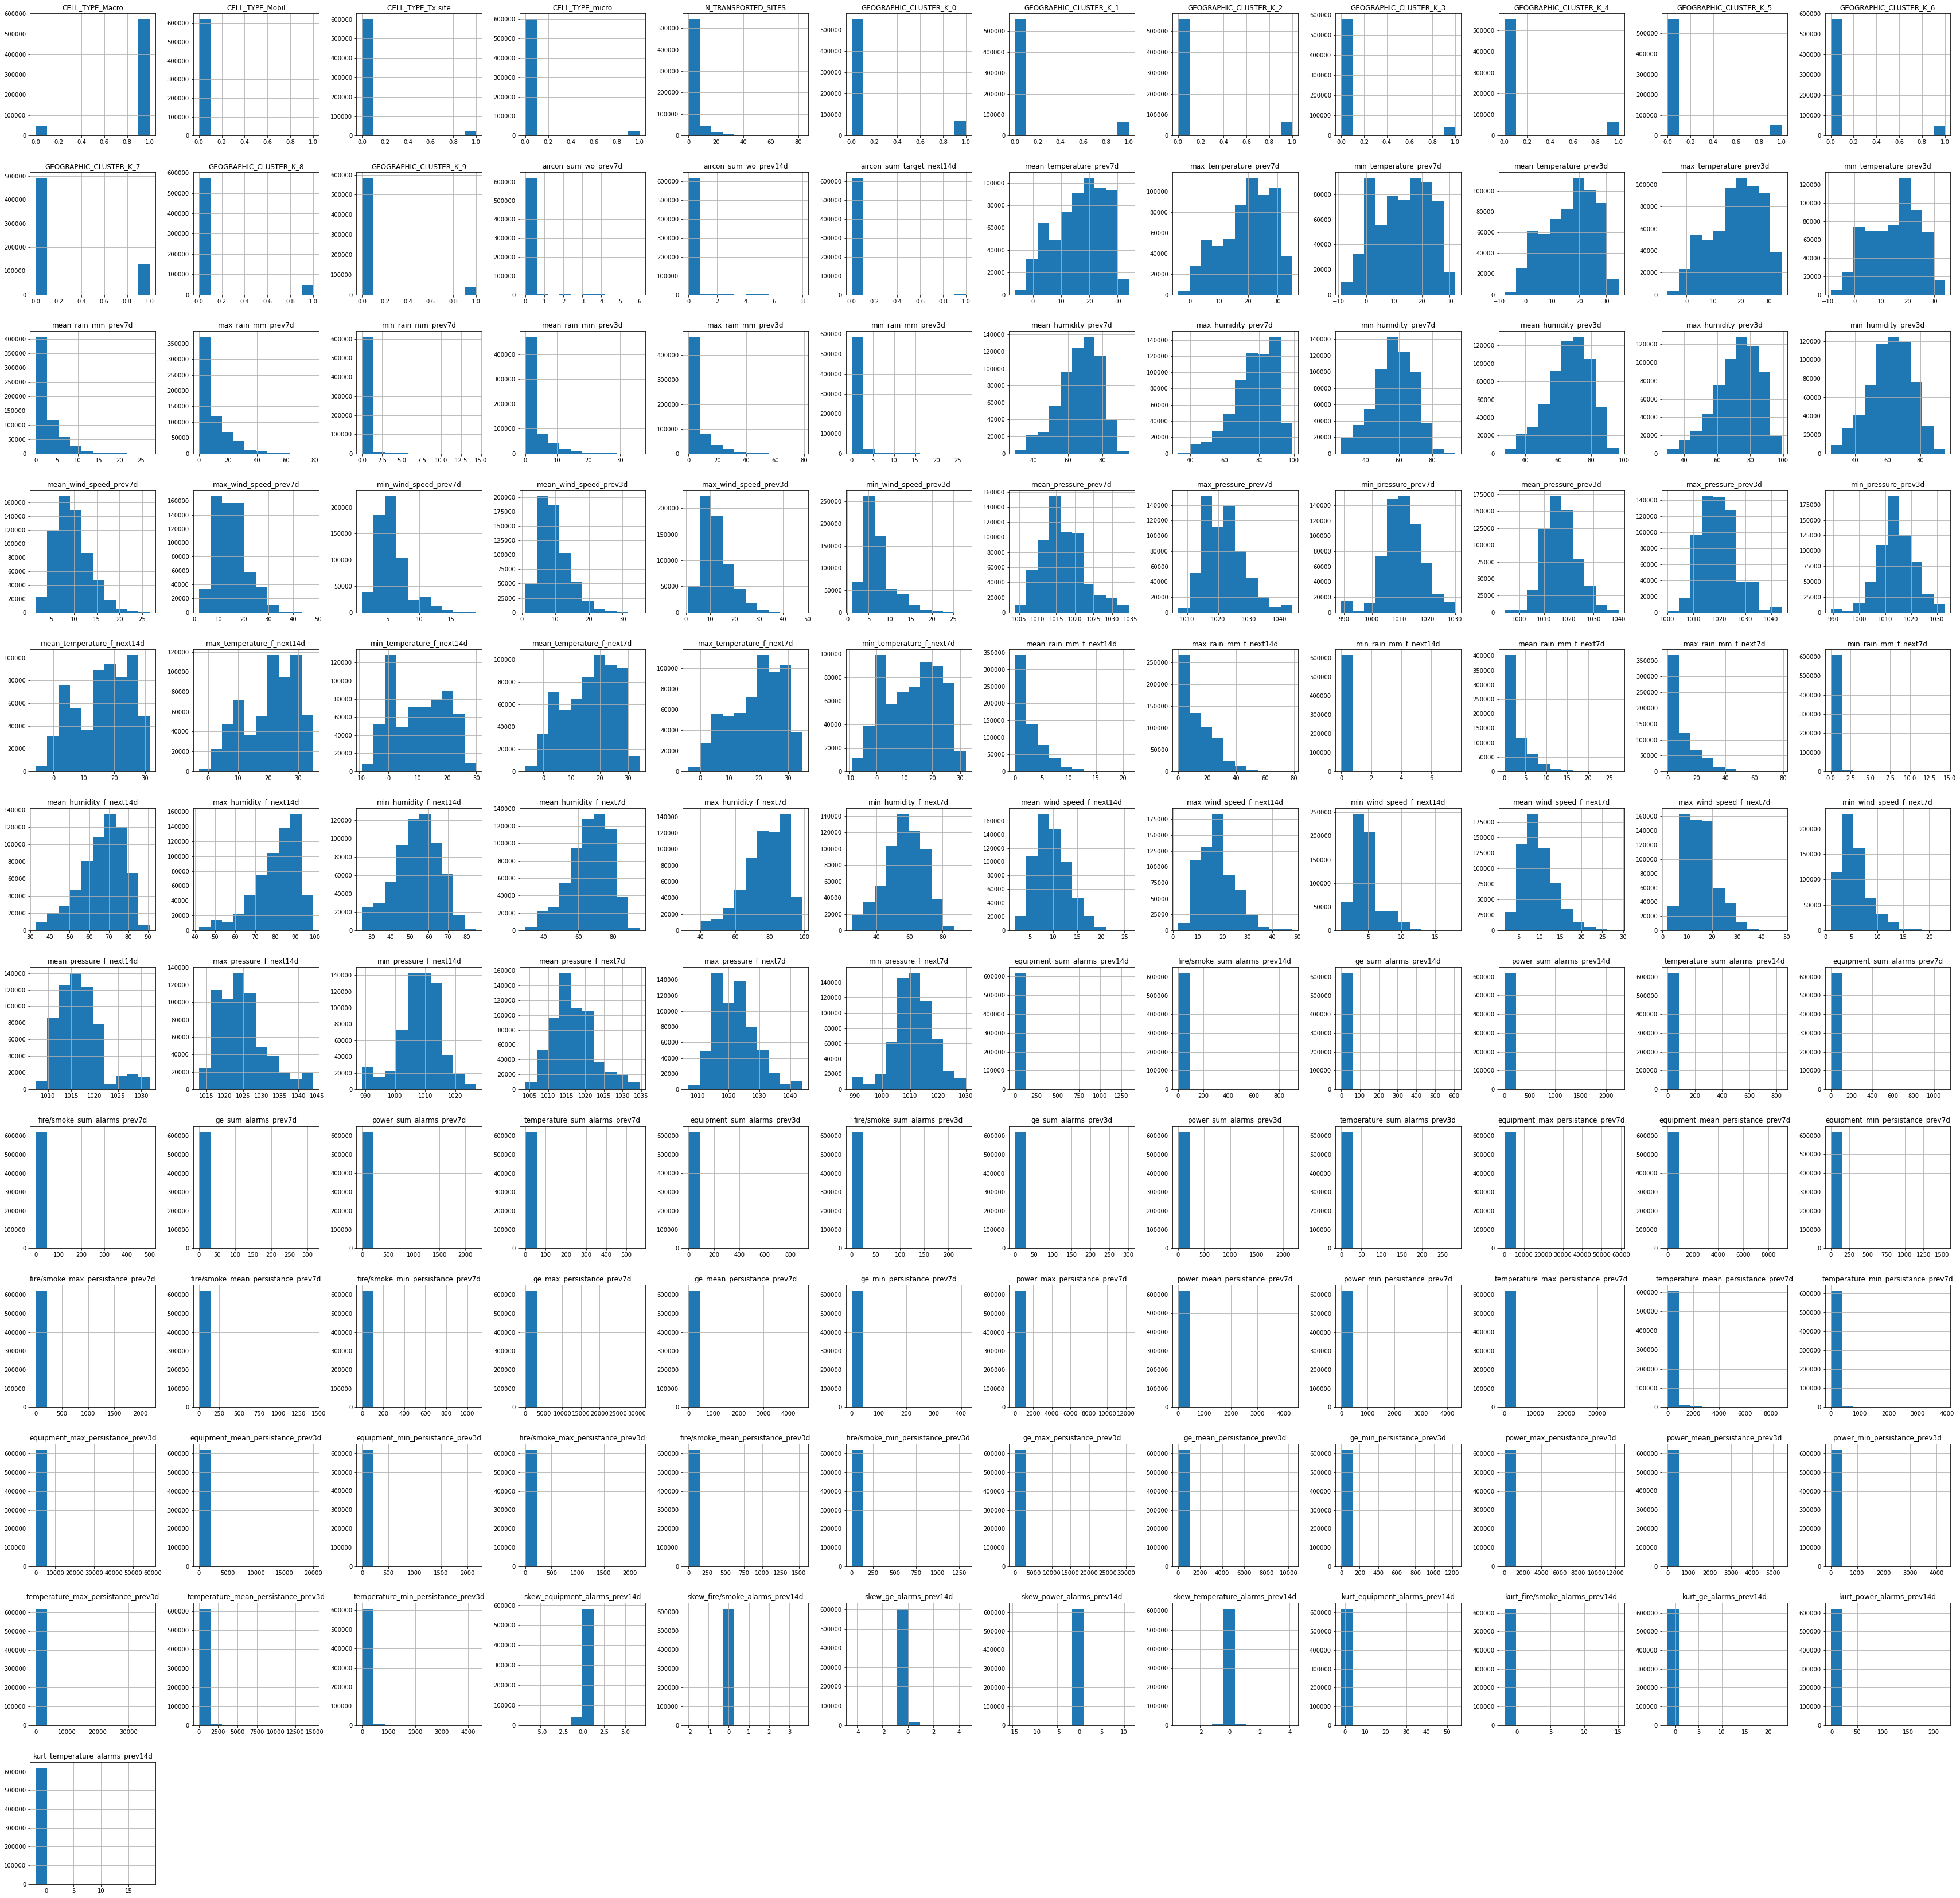

In [161]:
all_hist_fig = df.hist(figsize = (60,60))

as we can see in the data visualization part we have different types of distributions for our data.

## 3.4- Outlier Analysis

for our analysis as we anticipated before we should Separate our data and group them by their types of Distribution. 
separating the categorical with numerical *********

In [140]:
categorical_df = pd.concat([df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'], df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']], axis = 1)
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_wo_prev14d']
n_transported_sites = df.loc[:,'N_TRANSPORTED_SITES']

In [141]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=True), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']## Numerical
sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df) 

#Skewness and Kurt
skew_cat_alarms_prev14d = df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']

all_numerical_df = pd.concat([sorted_numerical_df,sorted_sum_alarm_df,sorted_persistance_df],axis=1)

In [142]:
skew_cat_alarms_prev14d = replace_skwurt_outliers(skew_cat_alarms_prev14d, True)
kurt_cat_alarms_prev14d = replace_skwurt_outliers(kurt_cat_alarms_prev14d, False)
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

In [143]:
skew_cat_alarms_prev14d

,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
160195,0.0,0.0,0.0,0.0,0.0
160196,0.0,0.0,0.0,0.0,0.0
160197,0.0,0.0,0.0,0.0,0.0
160198,0.0,0.0,0.0,0.0,0.0


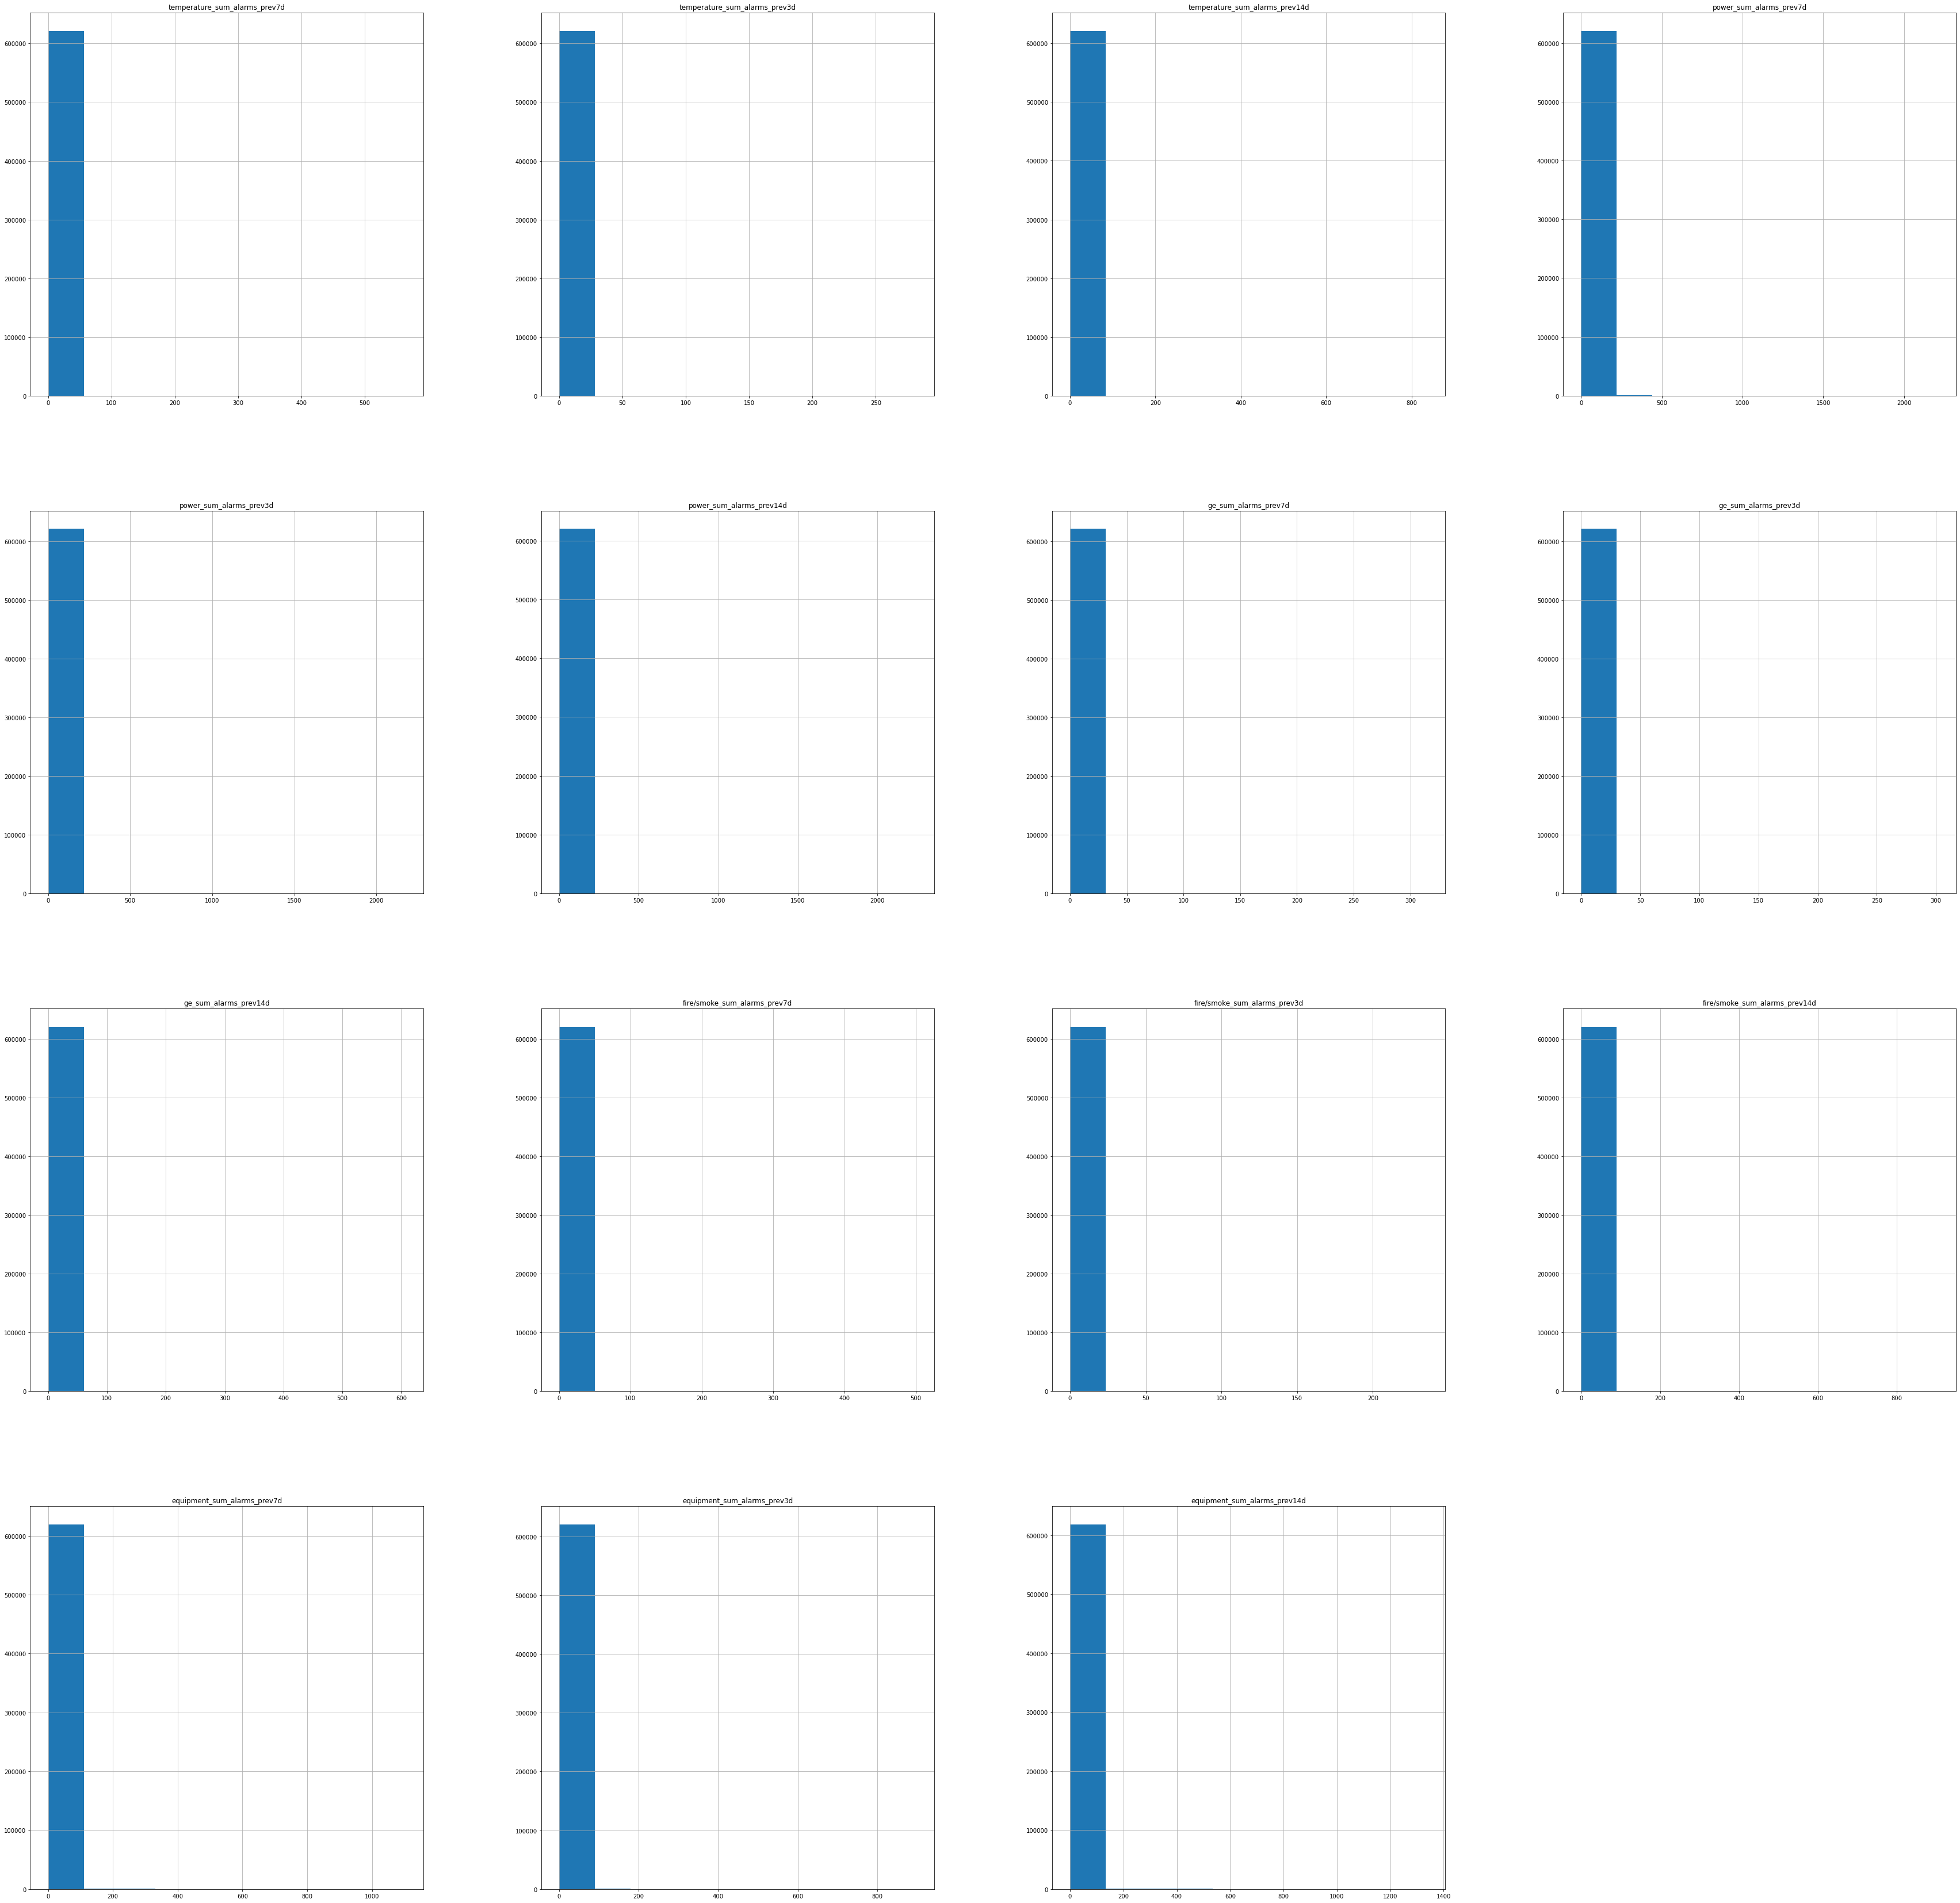

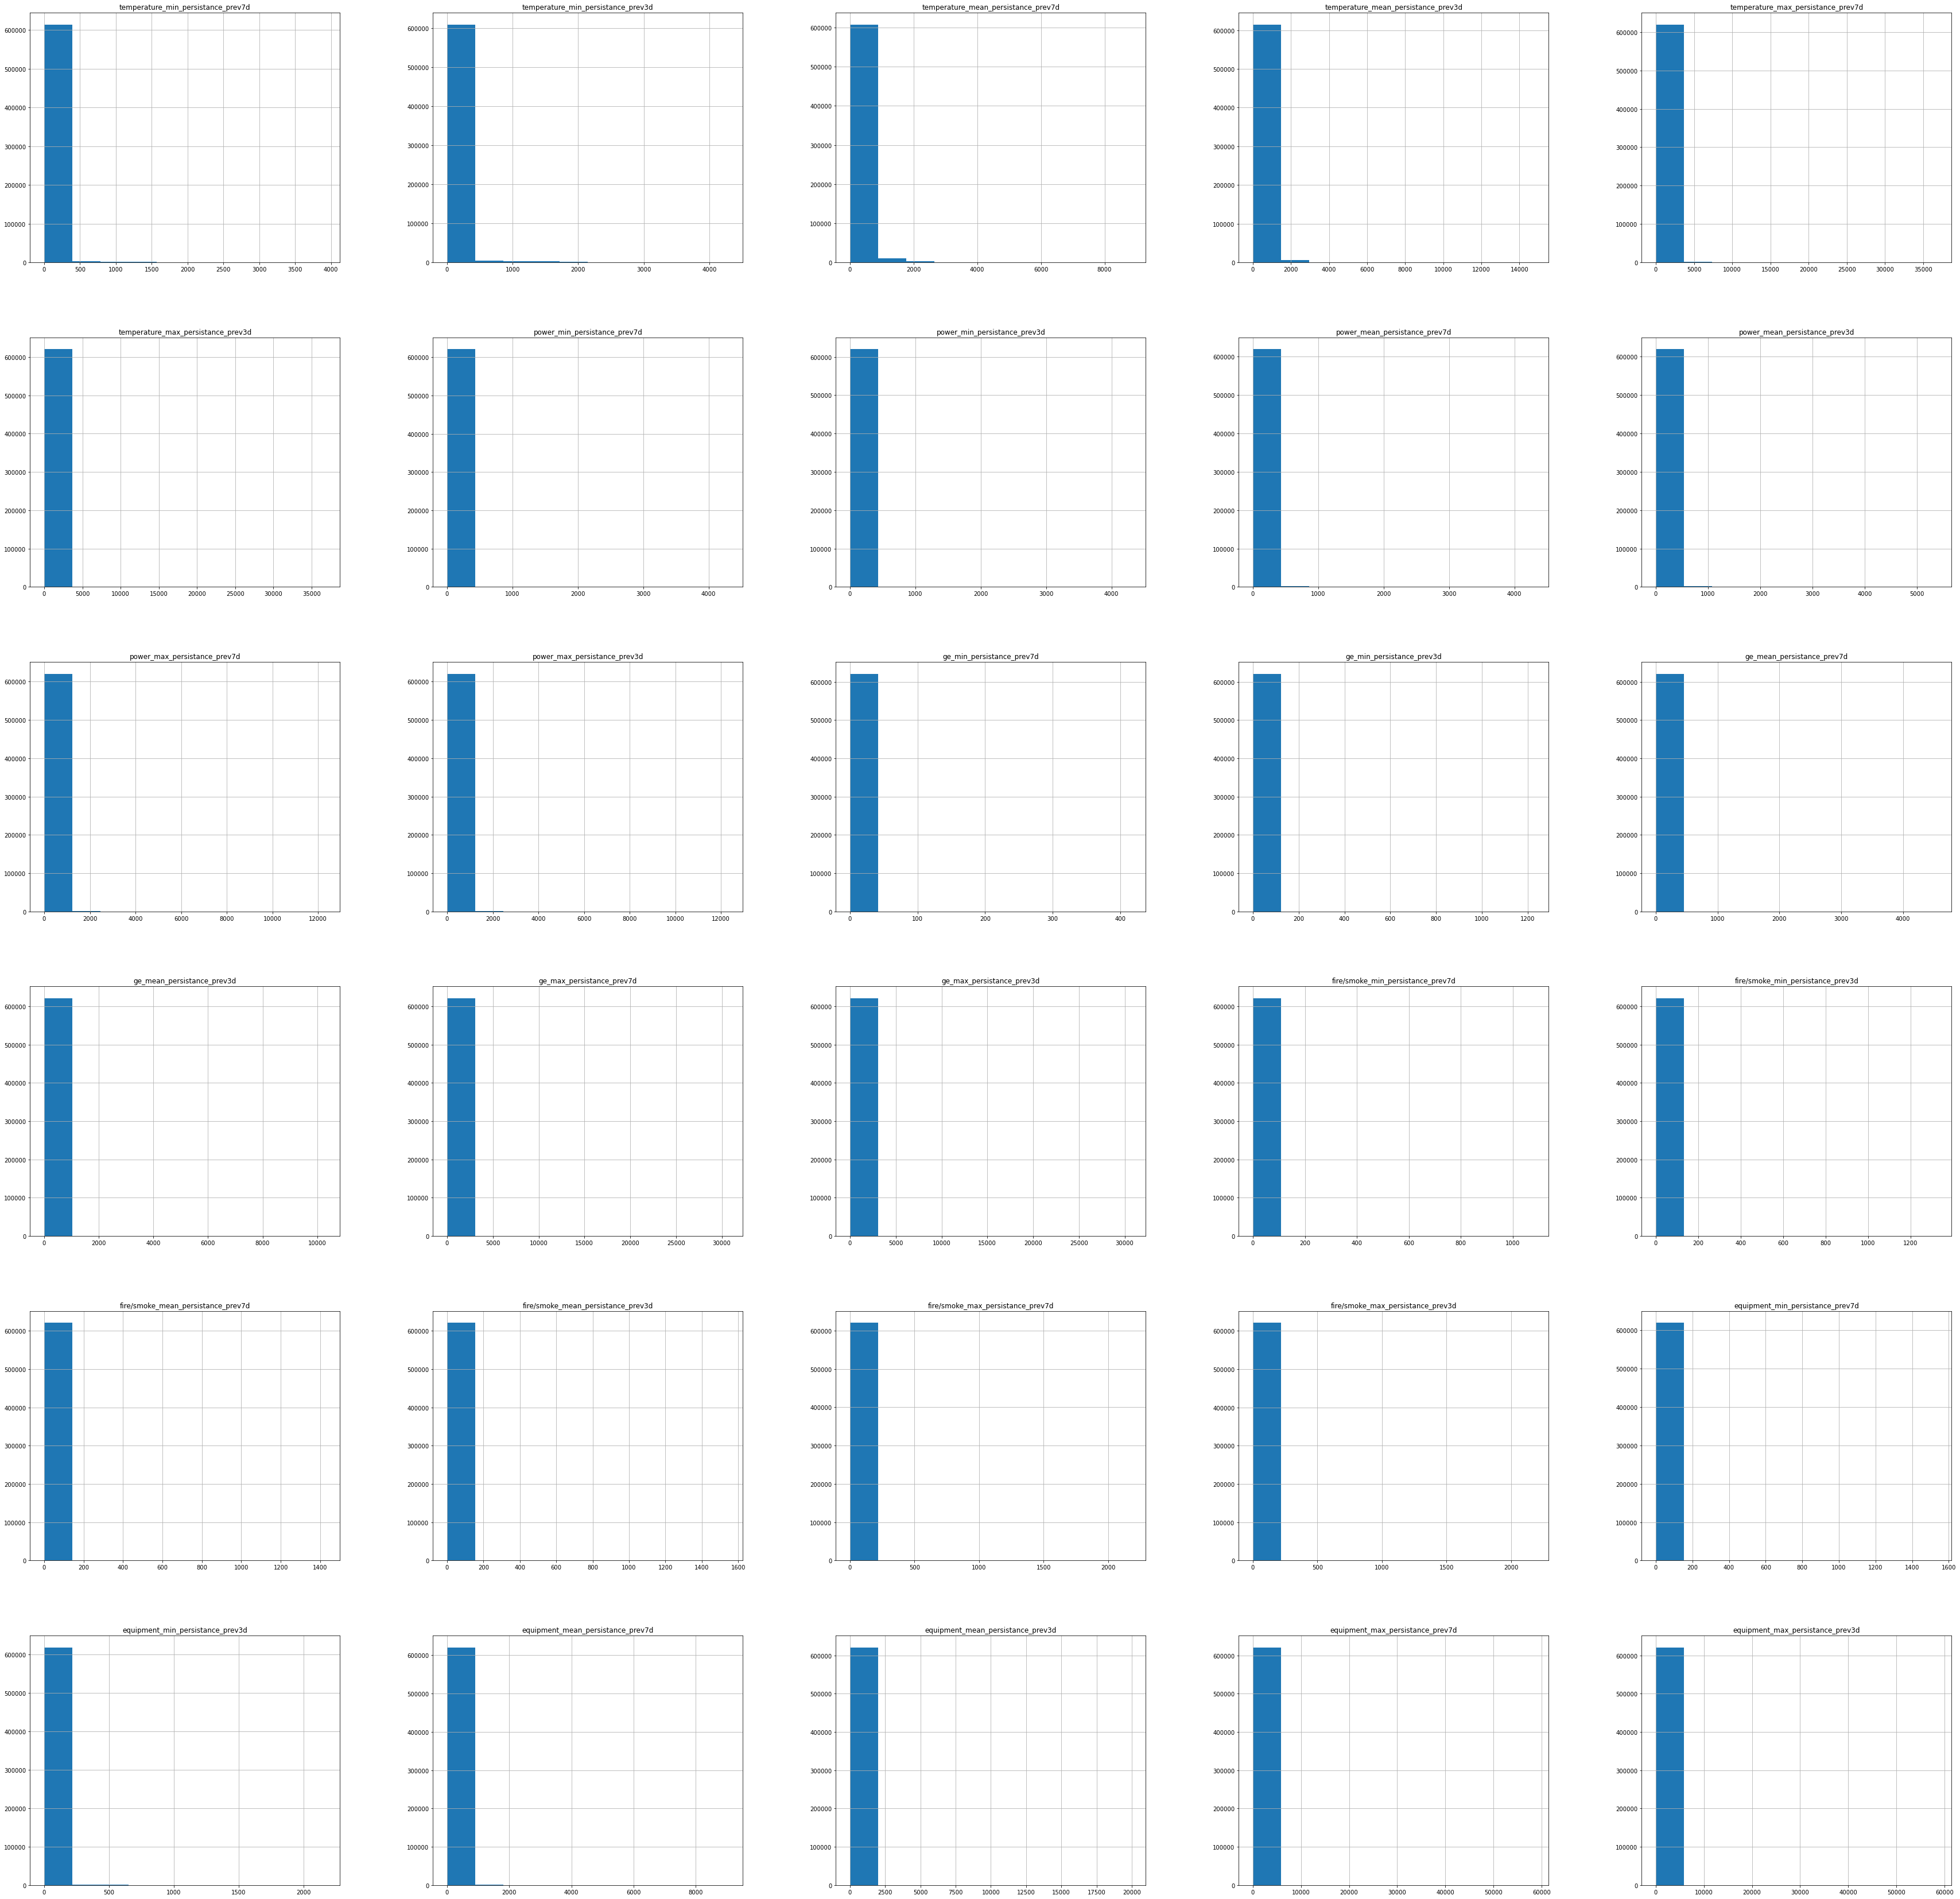

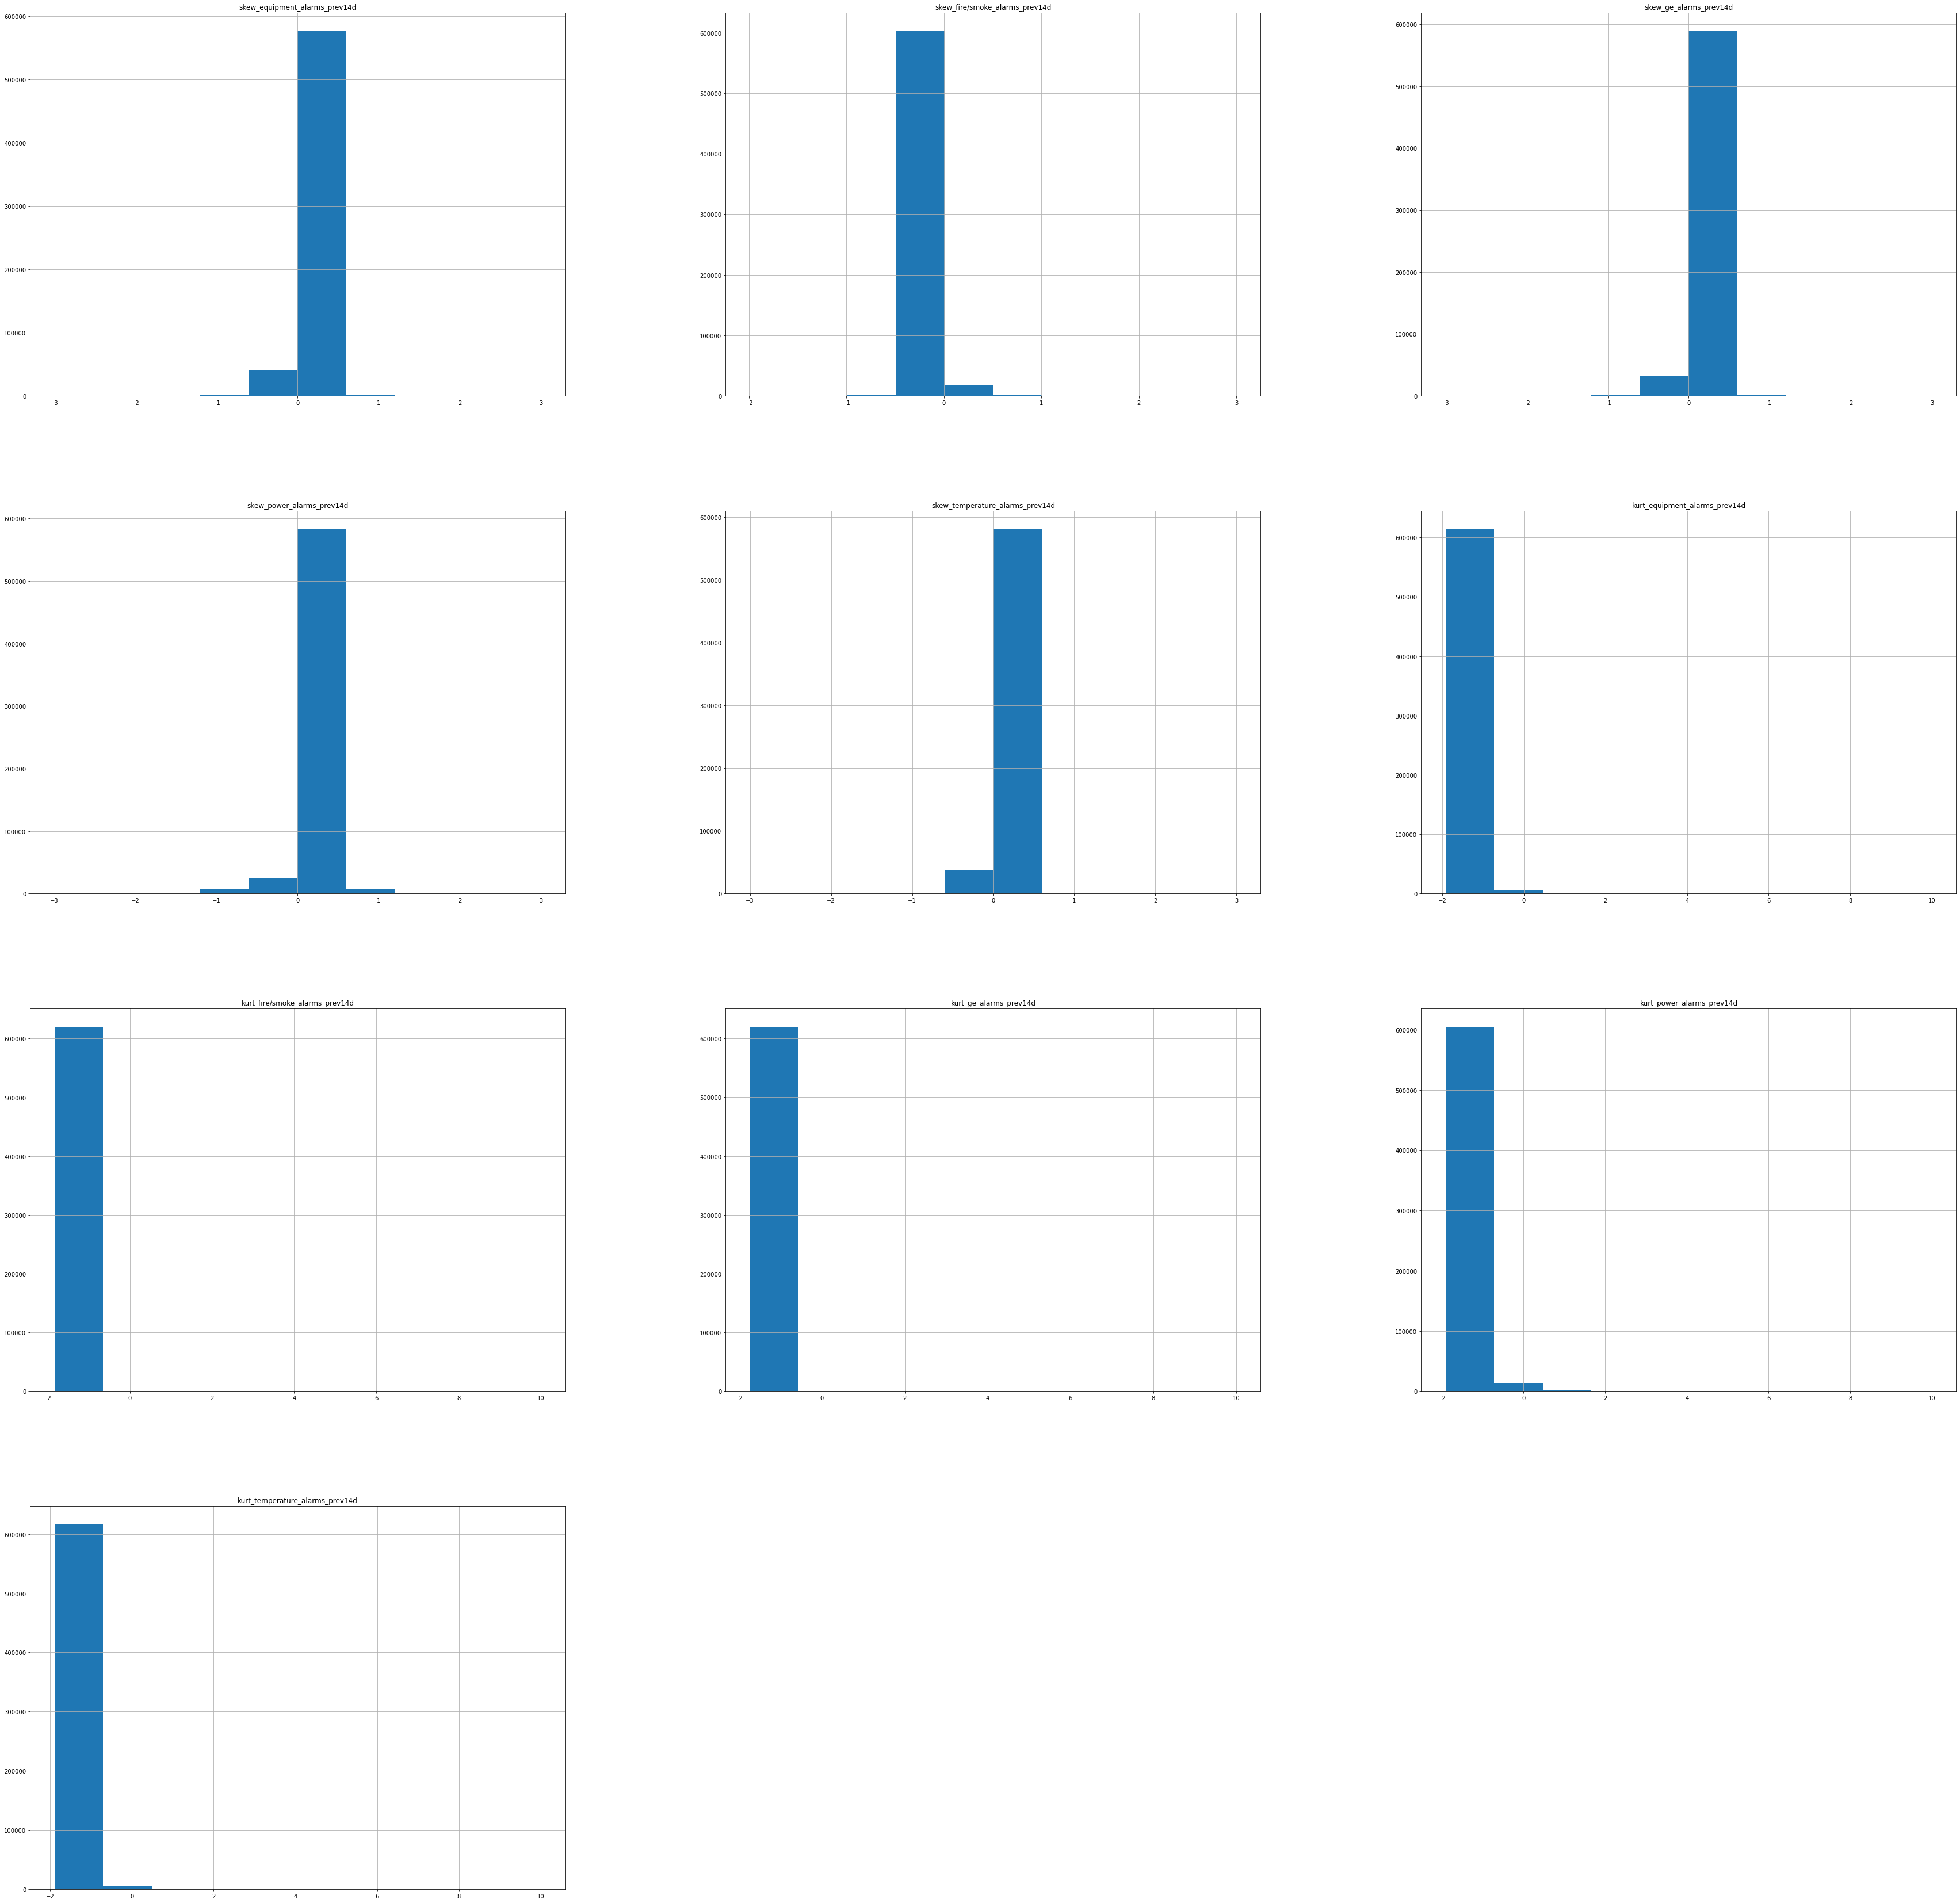

In [166]:
sorted_sum_alarm_df.hist(figsize = (60,60))
sorted_persistance_df.hist(figsize = (60,60))
sk = skwurt.hist(figsize = (60,60))

we can see these types of distribution associated to these group are some how normal so we can use a power transform to make them guassian like. accordingly the so caled transformation scale down all the features showing us a better visualization of outliers. there by is not needed any more to use `StandardScalar()`

In [144]:
all_numerical_df_np = power_transform(all_numerical_df, method = 'yeo-johnson')

/Users/tara/anaconda3/envs/data-mining-test/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


after the transformation we get a numpy array we need to convert it again to a data frame

In [145]:
all_numerical_df = pd.DataFrame(all_numerical_df_np, columns = all_numerical_df.columns)

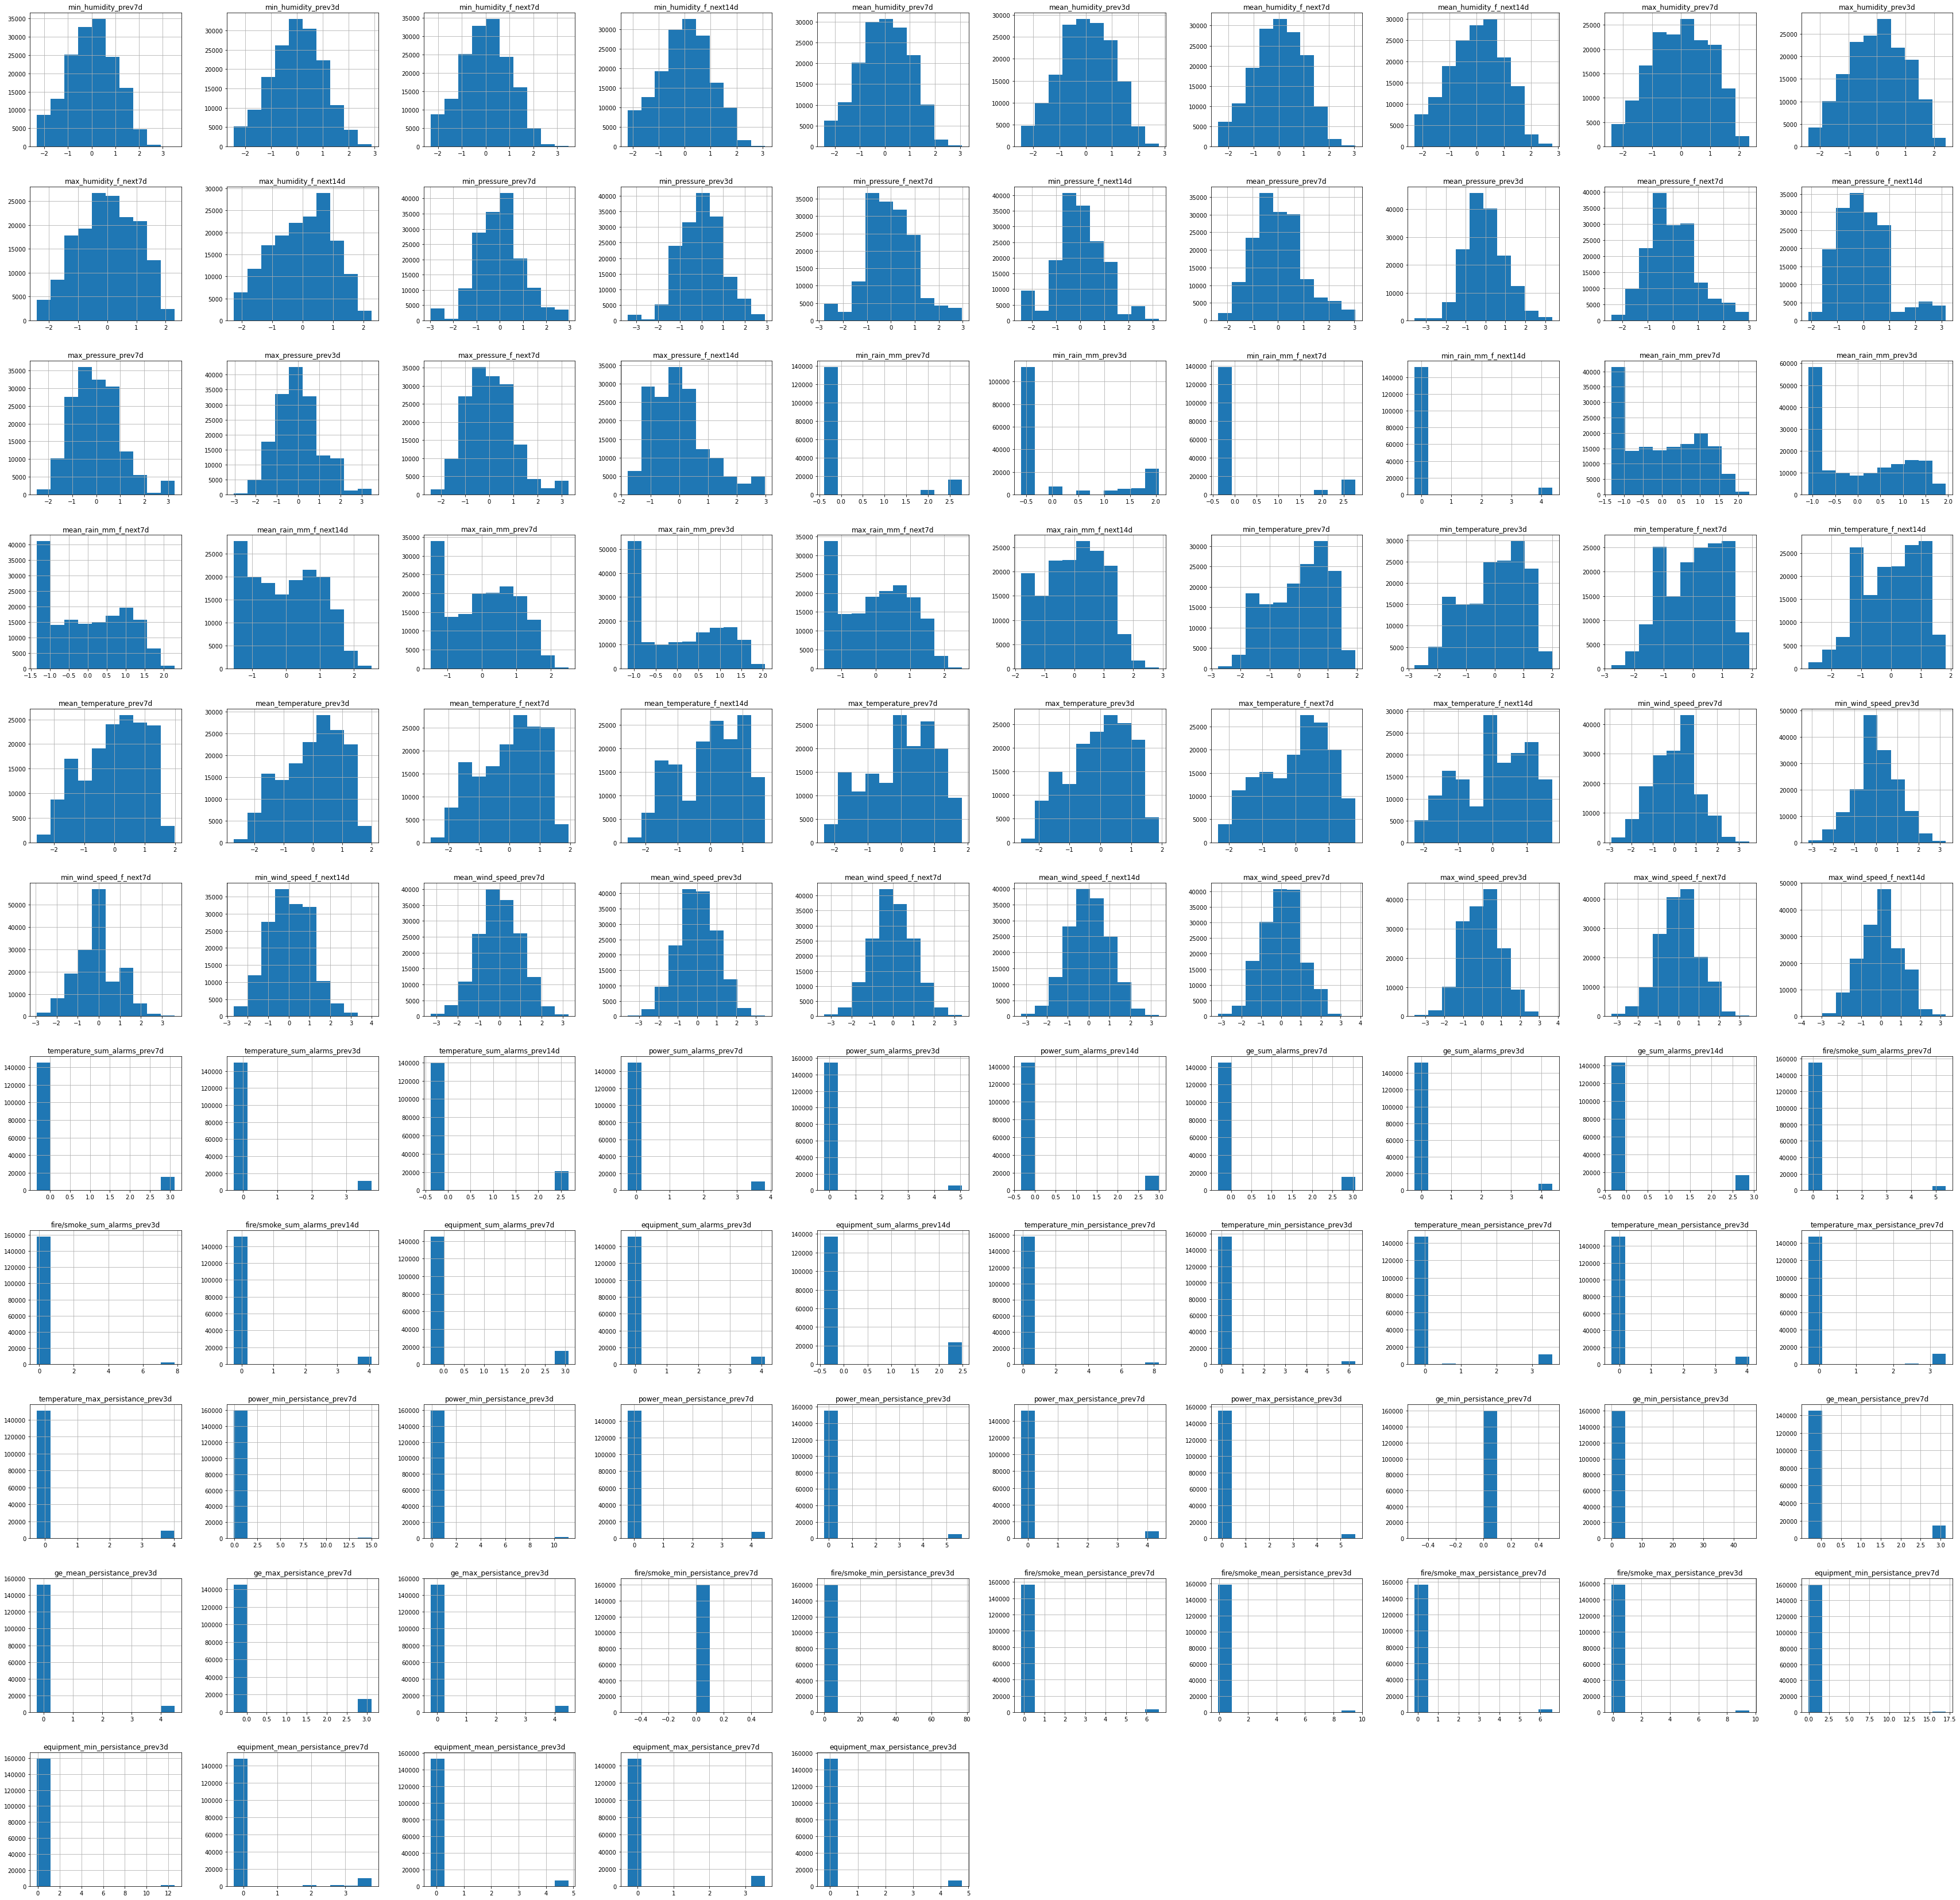

In [146]:
all_hist = all_numerical_df.hist(figsize=(60,60))

In [147]:
all_numerical_df_mean = all_numerical_df.mean()
all_numerical_df_std = all_numerical_df.std()

after the transformation using the std rule we can eliminate the outliers.

In [148]:
all_numerical_df = replace_outliers(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

In [149]:
print_clean_col(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

the number of cleaned columns are  105


As you can see almost all outliers are deleted

In [150]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = all_numerical_df.loc[: , 'temperature_sum_alarms_prev7d':'equipment_sum_alarms_prev14d' ]

#Sort persistance's correlated columns
sorted_persistance_df = all_numerical_df.loc[:, 'temperature_min_persistance_prev7d': 'equipment_max_persistance_prev3d']


#sort Numerical's  columns 
sorted_numerical_df = all_numerical_df.loc[: , 'min_humidity_prev7d':'max_wind_speed_f_next14d']## Numerical

### 3.5 Feature Aggregation 

We know that a lot of features has correlation to each other. This correlation can reduce the performance of our model also aggreagating the model results in reduction of memory consumption and processing time
Aggregations provide us with a high-level view of the data as the behaviour of groups or aggregates is more stable than individual data objects

Now that we don't have outliers anymore we should try to reduce the number of features that we have.

In [151]:
# copy
snv = sorted_numerical_df.copy()
index = 0
counter = len(snv.columns)

#create an empty celane_df_ to save pruned numerical feature
pruned_num_df = snv.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = snv.iloc[:, index:index+4]
    pruned_num_df['ind_'+snv.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3) + (cl.iloc[:, i+2]/7) + (cl.iloc[:, i+3]/14))* 3/2

    index+=4

pruned_num_df

,ind_min_humidity_prev7d,ind_mean_humidity_prev7d,ind_max_humidity_prev7d,ind_min_pressure_prev7d,ind_mean_pressure_prev7d,ind_max_pressure_prev7d,ind_min_rain_mm_prev7d,ind_mean_rain_mm_prev7d,ind_max_rain_mm_prev7d,ind_min_temperature_prev7d,ind_mean_temperature_prev7d,ind_max_temperature_prev7d,ind_min_wind_speed_prev7d,ind_mean_wind_speed_prev7d,ind_max_wind_speed_prev7d
0,-0.430387,0.085927,0.468725,-0.834004,-0.728266,-0.723976,-0.493002,0.857219,0.985659,-0.434045,-0.491482,-0.509189,0.740672,1.431801,1.492263
1,0.039532,0.235075,0.393225,-0.592422,-0.771269,-0.817108,-0.106775,0.969904,0.884908,-0.411126,-0.422724,-0.406276,0.740672,1.138776,0.988351
2,0.160235,0.451481,1.142625,-0.437748,-0.707809,-0.808456,-0.106775,1.388707,1.327788,-0.388398,-0.396124,-0.311200,0.740672,1.491889,1.552682
3,0.160235,0.665392,1.142625,-0.456655,-0.459642,-0.424150,0.591725,1.399185,1.327788,-0.541479,-0.506301,-0.285966,1.342210,1.835759,1.526728
4,0.883405,0.975142,1.142625,-0.346701,-0.169439,-0.091682,0.440648,1.351853,1.327788,-0.618757,-0.663085,-0.614077,1.505190,1.797474,1.444512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160195,0.608215,1.490792,1.807231,-0.775870,-0.247494,0.362079,0.726846,1.748796,1.578258,-1.351090,-1.382825,-1.410669,-0.746470,-0.291897,0.244806
160196,0.608215,1.517432,1.653130,-0.775870,-0.253423,0.407603,0.726846,1.685694,1.535774,-1.409603,-1.446854,-1.410669,-0.334556,-0.215982,0.244806
160197,0.249499,1.305671,1.653130,-0.775870,-0.141686,0.478652,0.813782,1.698045,1.535774,-1.409603,-1.474672,-1.443541,-0.654794,-0.106802,0.388605
160198,0.273306,1.276494,1.653130,-0.413024,0.063058,0.408603,-0.493002,1.338835,1.239242,-1.409603,-1.361535,-1.219468,-0.527889,-0.122264,0.388605


after pruning we get the correlation between variables here we see that we can remove the very cirrelated features

*just as an idea between the highly correlated features we can keep the one with the highest covariance*
**Notice** here the prev7 is just a name but in reality we aggregated every thing 

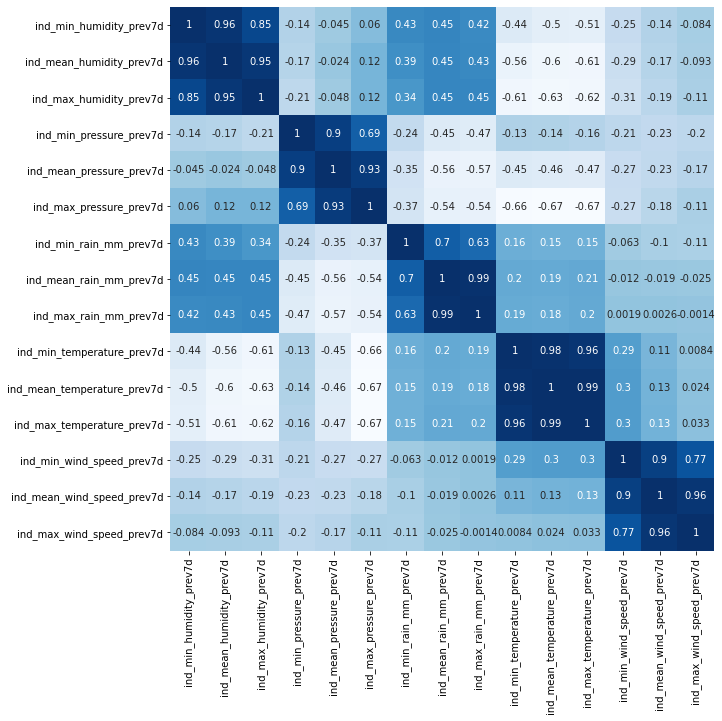

In [152]:
pruned_num_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig('correlationAfterPruning.png')

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [153]:
pruned_num_df = compare_corr_values(pruned_num_cov, pruned_num_df)

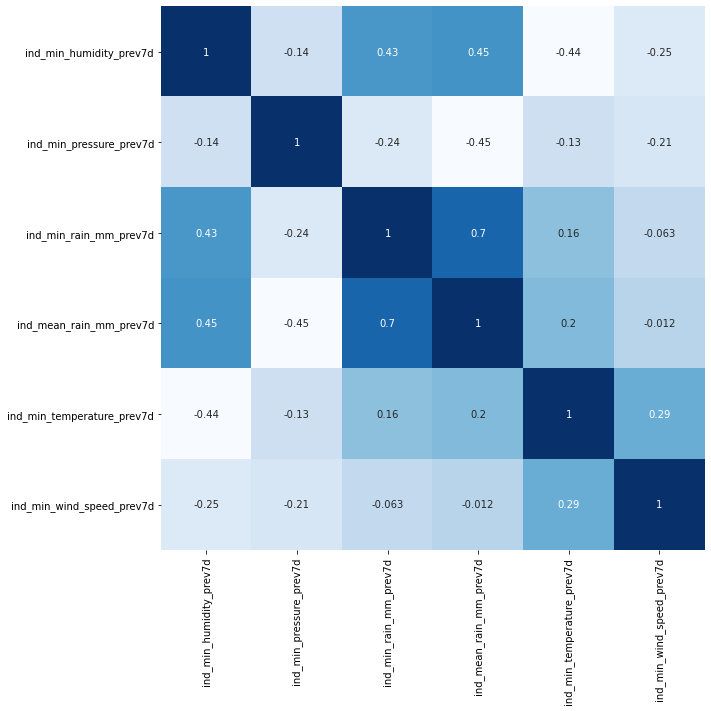

In [154]:
pruned_num_df_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig('correlationReducingHighlyRelatedValuesNumericals.png')

In this step we are going to prune the cat_m3_persistance_prevXd data and reduce the features. To do this we assing a weight to each Xdays (3day = 1/3, 7day = 1/7, 14day = 1/14

In [155]:
spd = sorted_persistance_df
index = 0
counter = len(spd.columns)

#create an empty celane_df_ to save pruned persistance feature
pruned_persistance_df = spd.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = spd.iloc[:, index:index+2]
    pruned_persistance_df['ind_'+spd.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3)) * 2.1

    index+=2

pruned_persistance_df

,ind_temperature_min_persistance_prev7d,ind_temperature_mean_persistance_prev7d,ind_temperature_max_persistance_prev7d,ind_power_min_persistance_prev7d,ind_power_mean_persistance_prev7d,ind_power_max_persistance_prev7d,ind_ge_min_persistance_prev7d,ind_ge_mean_persistance_prev7d,ind_ge_max_persistance_prev7d,ind_fire/smoke_min_persistance_prev7d,ind_fire/smoke_mean_persistance_prev7d,ind_fire/smoke_max_persistance_prev7d,ind_equipment_min_persistance_prev7d,ind_equipment_mean_persistance_prev7d,ind_equipment_max_persistance_prev7d
0,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
1,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
2,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
3,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
4,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160195,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160196,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160197,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282
160198,-0.147098,-0.261652,-0.263642,-0.082881,-0.192507,-0.192802,-0.015548,-0.253061,-0.253148,-0.009088,-0.118788,-0.118788,-0.07327,-0.231175,-0.232282


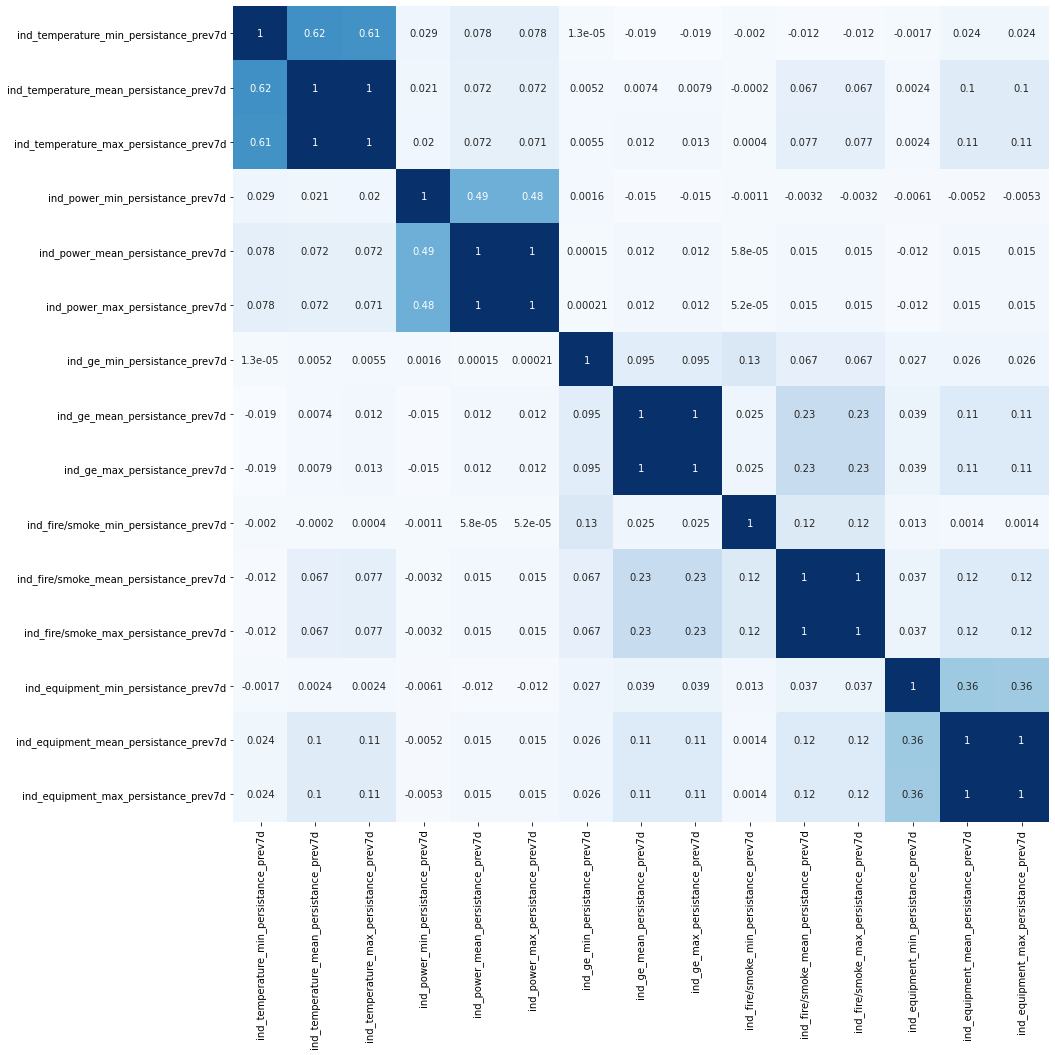

In [156]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig("pruned_persistance_df.png")

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [157]:
pruned_persistance_df = compare_corr_values(pruned_persistance_cov, pruned_persistance_df)

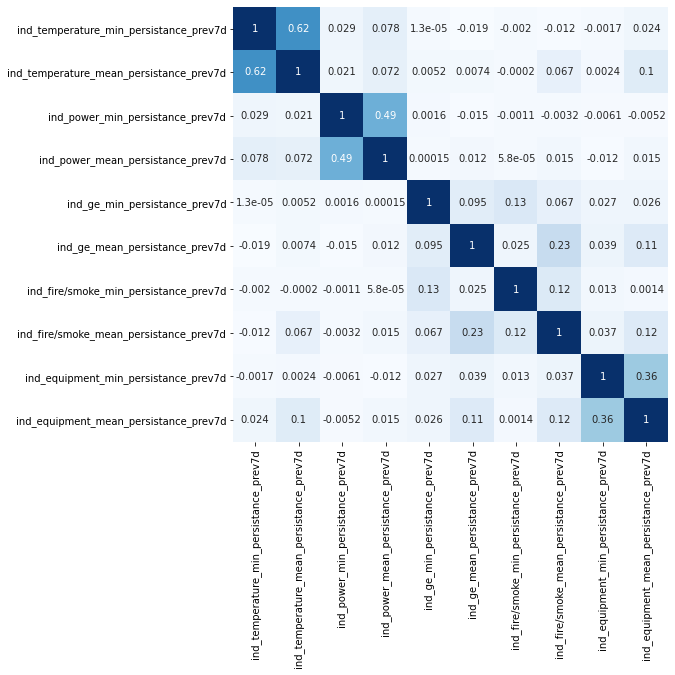

In [158]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (8,8))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig('pruned_persistance_df_after_removing_corr.png')

In [159]:
concat = pd.concat([pruned_persistance_df,pruned_num_df], axis=1)

For aggregating the number of alarm associated to the pre14 prev7 prev3 days we need to use the kurt and skew measures simce they are not normaliaze we need to normalize them

In [160]:
normalized_kurt_cat_alarms_prev14d = normalizer_df(kurt_cat_alarms_prev14d,True,False)
normalized_skew_cat_alarms_prev14d = normalizer_df(skew_cat_alarms_prev14d,True,False)

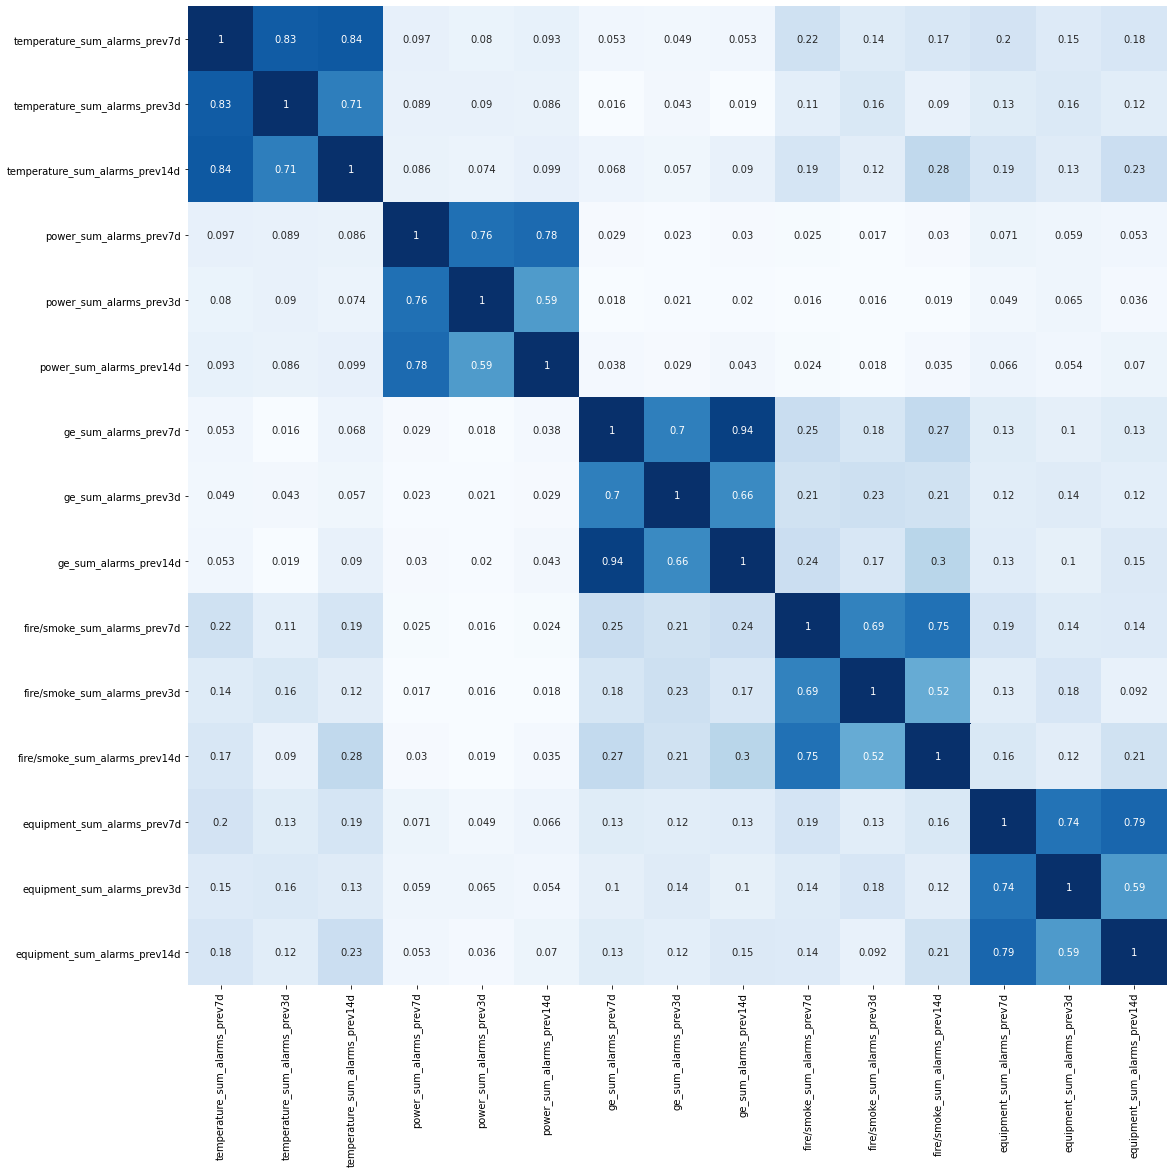

In [161]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig('sorted_sum_alarm_df.png')

as we can see some of the features are highly correlated to each other so using skurt and skew we want to combine them together

In [162]:
normalized_kurt_cat_alarms_prev14d.shape

(160200, 5)

In [163]:
sorted_sum_alarm_df = sorted_sum_alarm_df.copy()
print(sorted_sum_alarm_df.shape)
sorted_sum_alarm_df_agg = sorted_sum_alarm_df.iloc[0:0, 0:0]
print(sorted_sum_alarm_df_agg.shape)
for i in range(len(normalized_kurt_cat_alarms_prev14d.columns)):
    
    print(i)
    
    lentype = len(sorted_sum_alarm_df.columns)-i*3
    print(lentype)
    
    kurt = normalized_kurt_cat_alarms_prev14d.iloc[:,i]
    print(kurt.shape)
    
    skew = normalized_skew_cat_alarms_prev14d.iloc[:,i]
    print(skew.shape)

    name = sorted_sum_alarm_df.iloc[:,lentype-2].name
    print(name)   
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+7)
    
    sorted_sum_alarm_df_agg.loc[((skew <= -0.2) | (skew >= 0.2)), 
                            'aggregated_'+name] = (7*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+7+7)
    
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        1*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        2*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+2+1)
    
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (3*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+3)
    
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (2*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+2)

(160200, 15)
(0, 0)
0
15
(160200,)
(160200,)
equipment_sum_alarms_prev3d
1
12
(160200,)
(160200,)
fire/smoke_sum_alarms_prev3d
2
9
(160200,)
(160200,)
ge_sum_alarms_prev3d
3
6
(160200,)
(160200,)
power_sum_alarms_prev3d
4
3
(160200,)
(160200,)
temperature_sum_alarms_prev3d


In [164]:
sorted_sum_alarm_df = sorted_sum_alarm_df.copy()


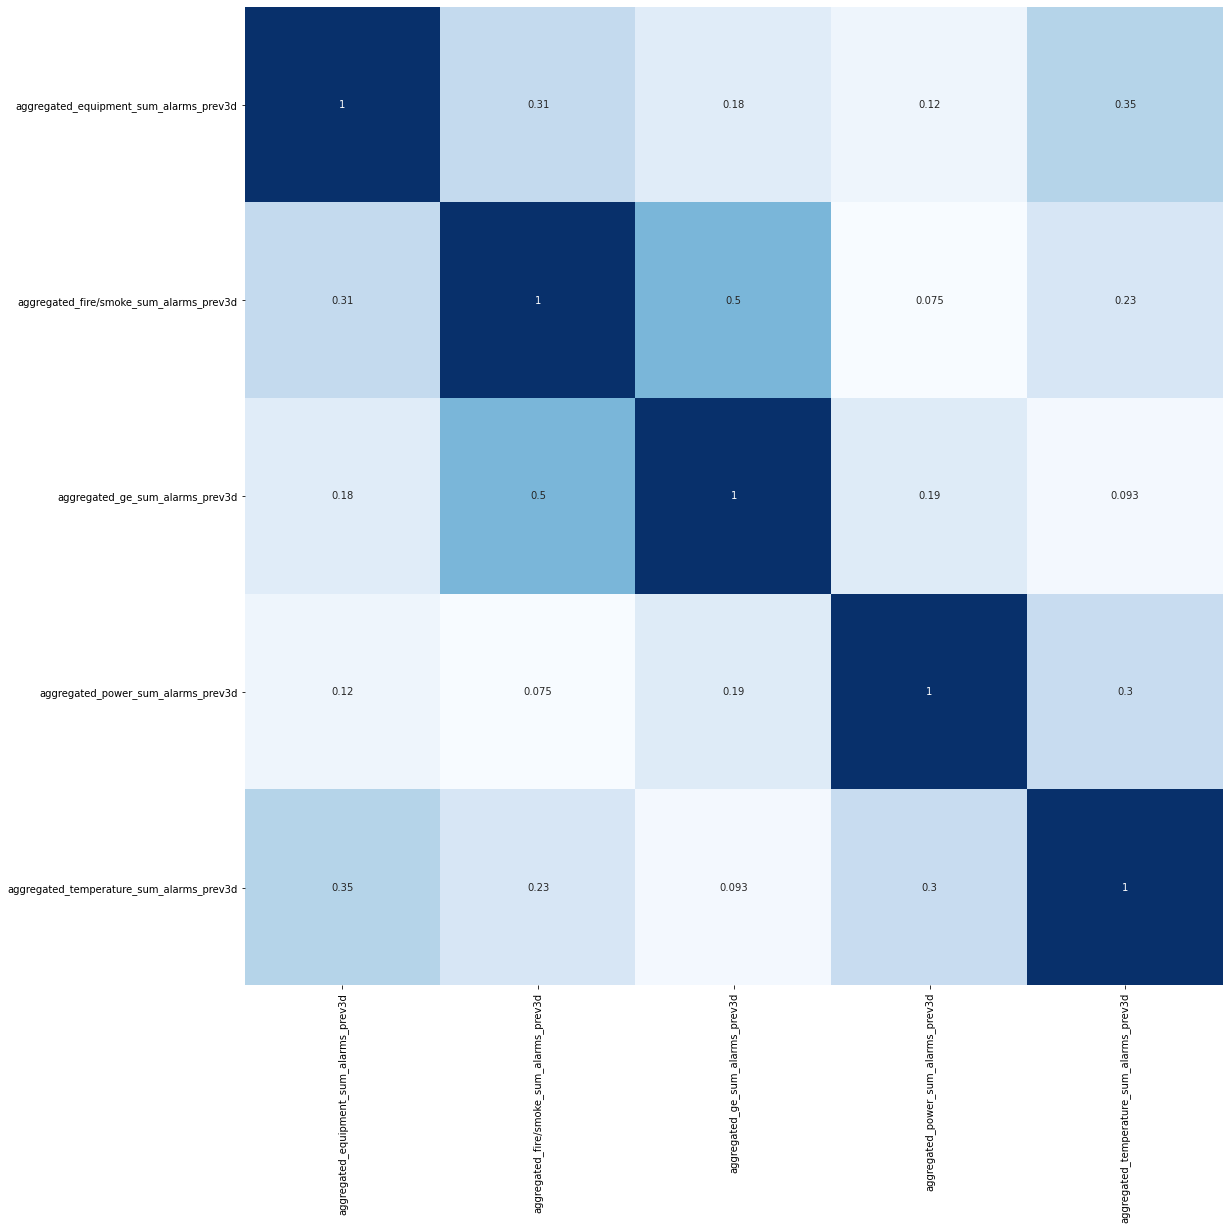

In [165]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df_agg], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)
plt.savefig('ddd.png')

In [166]:
concat_df = pd.concat([categorical_df, aircon_sum_wo_df, concat, sorted_sum_alarm_df_agg, skwurt], axis = 1)

In [190]:
concat_df.describe()

,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_Tx site,CELL_TYPE_micro,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,...,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
count,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,...,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000
mean,0.921777,0.000966,0.033317,0.036697,0.112023,0.102366,0.102366,0.069532,0.107195,0.082086,...,0.000186,0.000069,0.000004,-0.000051,0.000369,-1.189115,-1.207081,-1.205944,-1.168414,-1.196803
std,0.268523,0.031061,0.179464,0.188018,0.315395,0.303129,0.303129,0.254356,0.309361,0.274496,...,0.123010,0.054189,0.068413,0.170816,0.099539,0.247421,0.071722,0.125374,0.358389,0.158300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.000000,-1.990000,-3.000000,-3.000000,-3.000000,-1.920000,-1.830000,-1.730000,-1.910000,-1.890000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.212308,-1.212308,-1.212308,-1.210000,-1.210000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.210000,-1.210000,-1.212308,-1.210000,-1.210000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [191]:
concat_df.to_csv("concat_df_train.csv", index = False)

we now save this to a new csv to avoid doing all the step above for each iteration

## 3.6- Feature Selection 

First we should have a baseline performance to see our progress after each feature selection and select the best one

we start with loading our aggreagated and cleaned data

In [227]:
cleaned_df = pd.read_csv("concat_df_test.csv")


In [167]:
cleaned_df = concat_df

In [168]:
target = pd.read_csv('train.csv')

In [169]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
X_origin_df = cleaned_df
y_origin_df = target[target_variable]
# X_origin_df = cleaned_df

In [170]:
X_origin_np = np.array(X_origin_df)
y_origin_np = np.array(y_origin_df)

In [219]:
concat_df_cleaned= pd.concat([X_origin_df,y_origin_df], axis = 1)

In [196]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_origin_df, y_origin_df, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(434910, 47) (186390, 47)


### 3.5.1- Random Sampling 
we can see that the data is highly imbalanced. There are two approaches to deal with imbalanced data

**3.5.1 A:** Under sampling. In this approach we under sample the majority class to match minority class

**3.5.1 B:** Over sampling. In this approach we over sample the minirity class but duplicating them and adding small changes to them to match with the majority class


In [197]:
concat_df_tran = pd.concat([X_train,y_train], axis = 1)

In [198]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()
print(count_class_0, count_class_1)

432391 2519


#### 3.5.1 A- Under Sampling

Random under-sampling:
1    2519
0    2519
Name: aircon_sum_target_next14d, dtype: int64


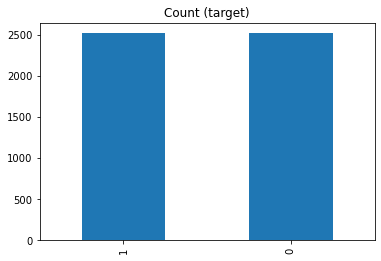

In [199]:
# Divide by class
df_class_0 = concat_df_tran[concat_df_tran[target_variable] == 0]
df_class_1 = concat_df_tran[concat_df_tran[target_variable] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under[target_variable].value_counts())

df_test_under[target_variable].value_counts().plot(kind='bar', title='Count (target)');

In [200]:
def evaluate_base_line(df_in, features = input_variables, should_use_samples = False):
    if should_use_samples:
        X = features
    else:
        X = df_in[features]
    X = np.array(X)
    X = normalizer_df(X)
    y = np.array(df_in[target_variable])
    kfolds = KFold(10,shuffle=True,random_state=0)
    model = linear_model.LogisticRegression(max_iter = 300)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=kfolds, n_jobs=-1)

    print("f1 Mean %.3f StdDev %.3f"%(scores.mean(),scores.std()))
    

In [201]:
evaluate_base_line(df_test_under)

f1 Mean 0.712 StdDev 0.019


In [202]:
kfolds = KFold(10,shuffle=True,random_state=0)

we can see with under sampling techniques we have loss of information so we should try over sampling with more Sophisticated methods for this reason we take help from python and scikit learn libraries

#### 3.5.1 A- Over Sampling

In [203]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = concat_df_tran[concat_df_tran[target_variable]==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = concat_df_tran[concat_df_tran[target_variable]==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=100000,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled[target_variable].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    432391
1    100000
Name: aircon_sum_target_next14d, dtype: int64

In [204]:
evaluate_base_line(df_oversampled)

f1 Mean 0.813 StdDev 0.002


In [220]:
target_variable = 'aircon_sum_target_next14d'
input_variables = concat_df_cleaned.columns[concat_df_cleaned.columns!=target_variable]

#### 3.5.2 Random Forest
We now apply a random forest and use its scoring to select the attributes. we apply this on the original data without sampling

In [ ]:
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X_origin_np, y_origin_np)

Let's plot the feature importance.

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
columns_name = []
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    columns_name.append(X_origin_df.columns[indices[f]])
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], X_origin_df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (60,60))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), columns_name,rotation=90, fontsize = 32)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [ ]:
X_selected_features_forest = feature_selection_model.transform(np.array(df_oversampled[input_variables]))
X_selected_features_forest.shape

At this point, it would be interesting to compare the performance of our target algorithm on the reduced datasets.

In [ ]:
evaluate_base_line(df_oversampled, X_selected_features_forest, True)

# VarianceThreshold

In [ ]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(df_oversampled)


mask = feature_selection_variance_model.get_support() #list of booleans
print("Reduced data set shape = ", X_selected_features_variance.shape)
print("     Selected features = ", input_variables[mask])
print("      Deleted Features = ", input_variables[~mask])

In [ ]:
evaluate_base_line(df_oversampled, input_variables[mask])

## PCA

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

full_pca_model = PCA()
X_std = StandardScaler().fit_transform(X_origin_np)
full_fitted_model = full_pca_model.fit(X_std)

In [172]:
full_fitted_model.explained_variance_ratio_.shape

(48,)

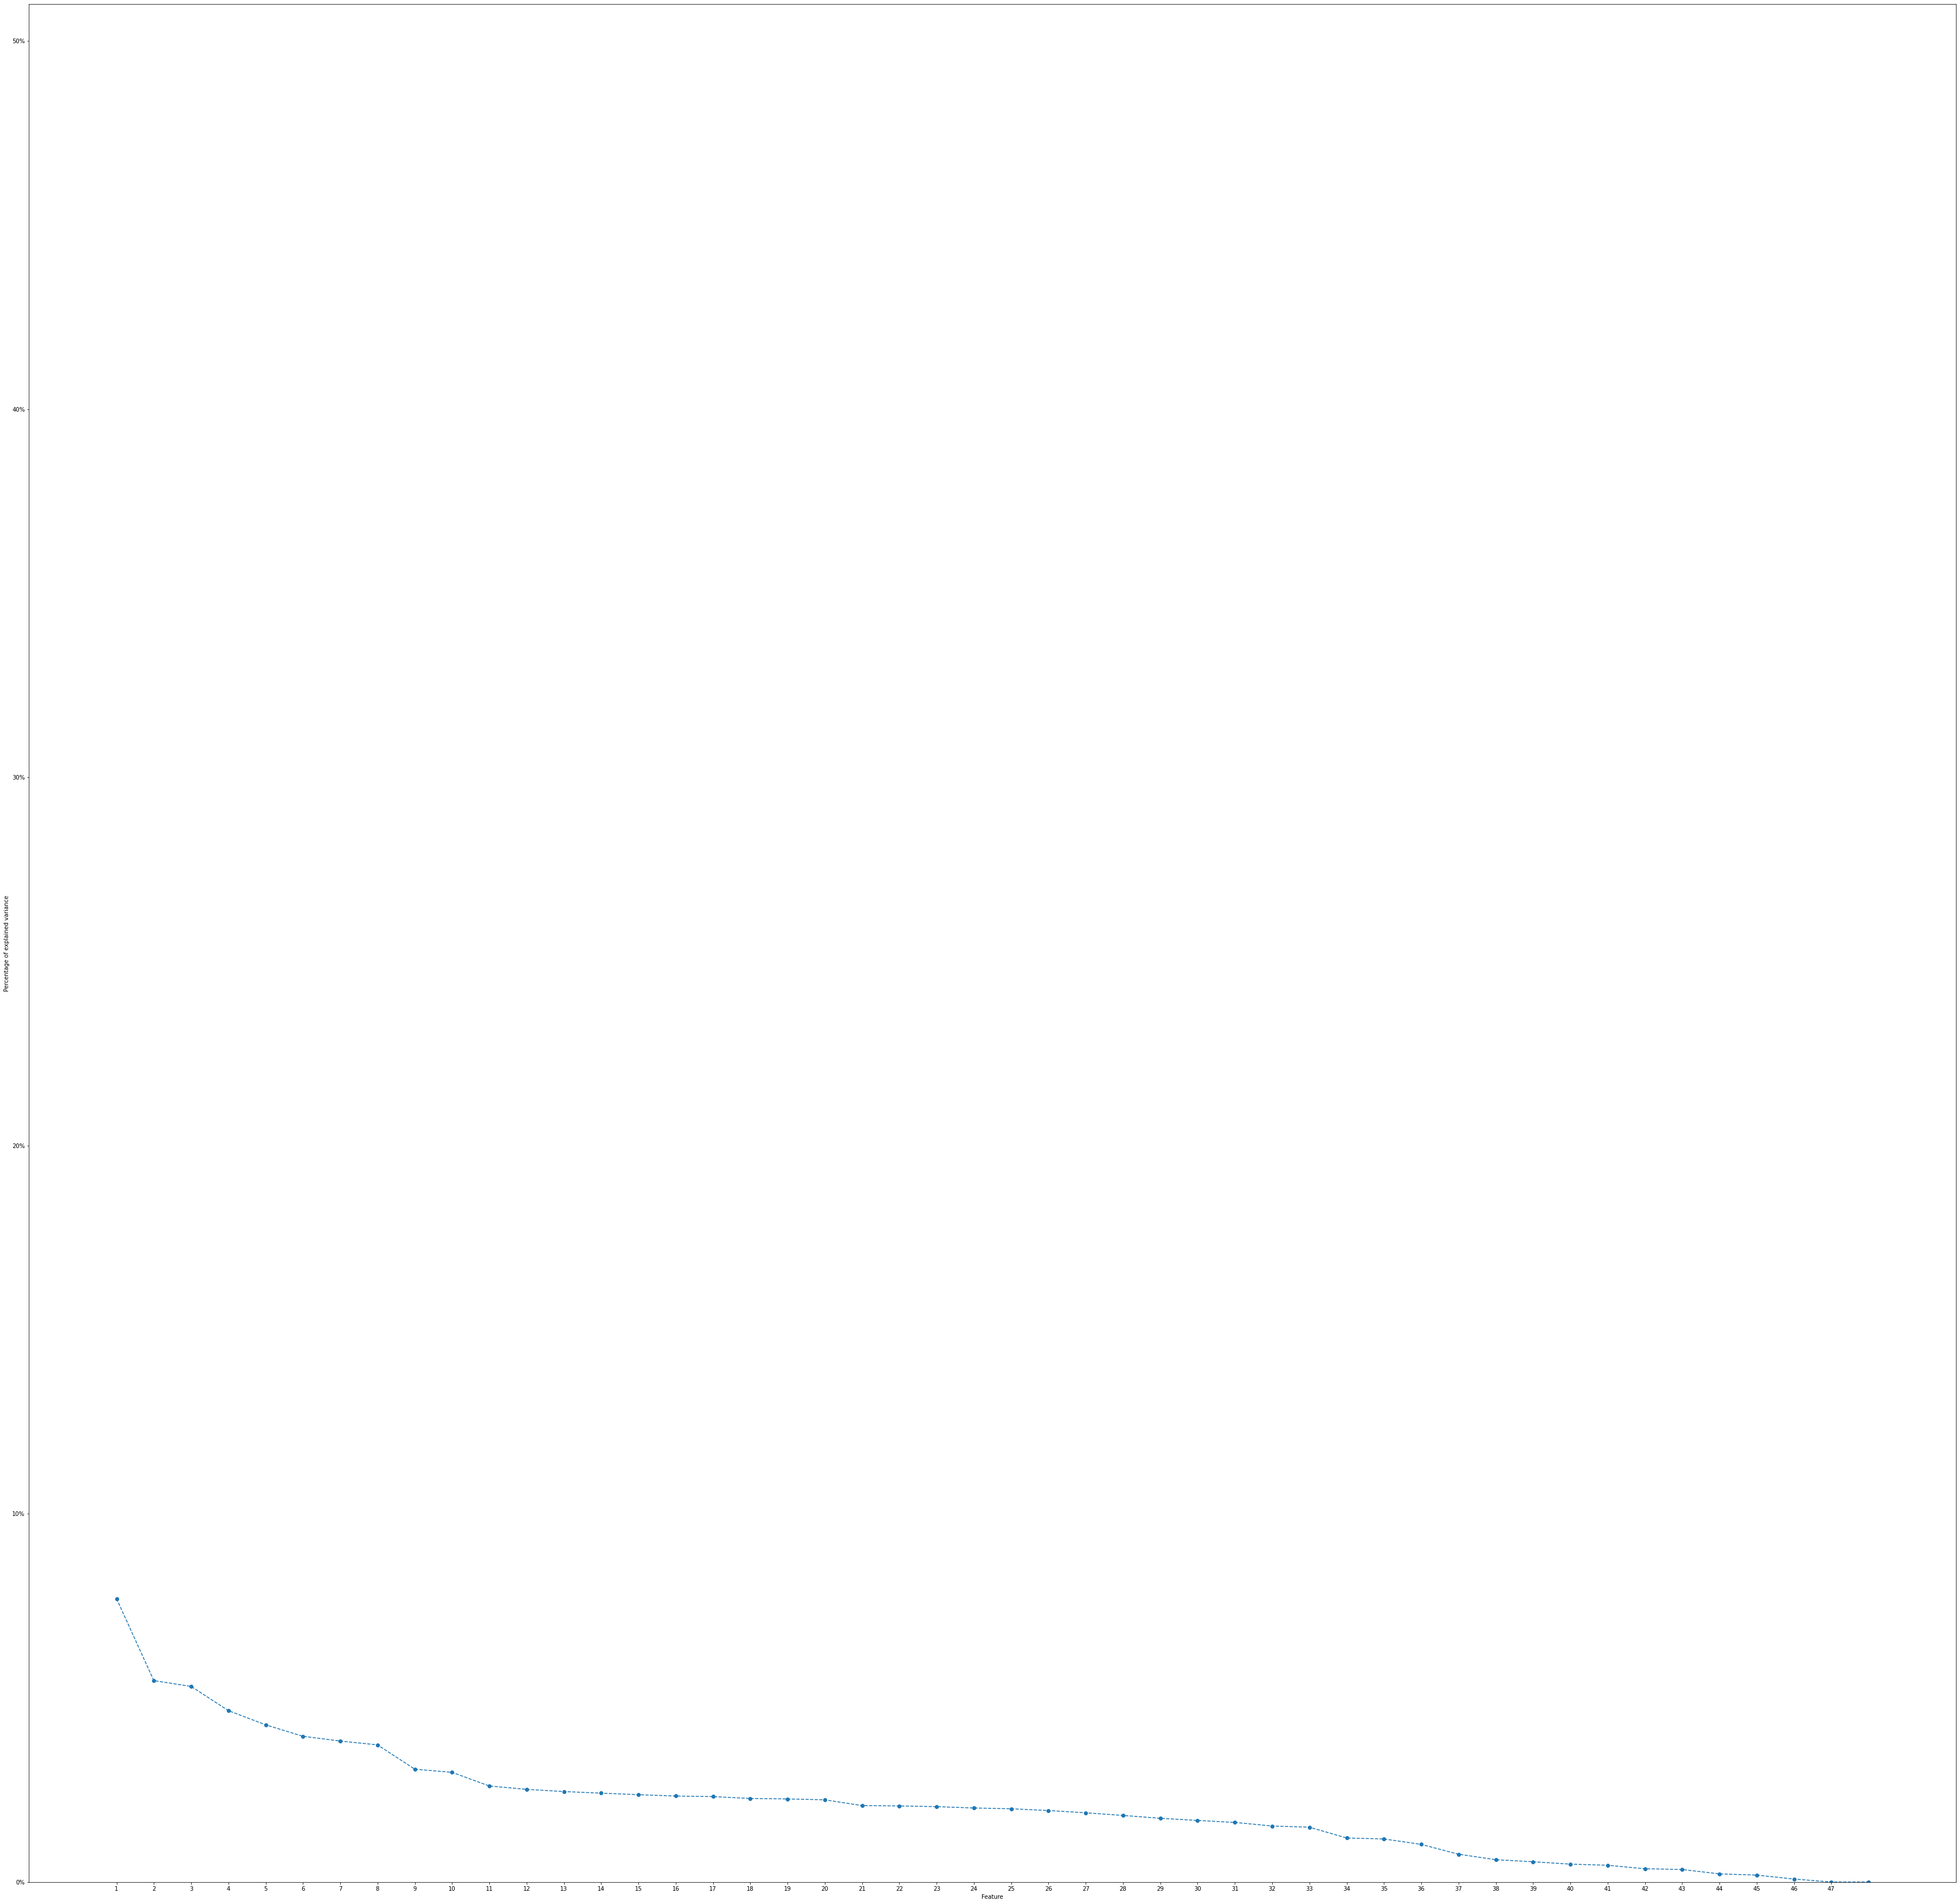

In [174]:
plt.figure(figsize=(60, 60));
plt.plot(full_fitted_model.explained_variance_ratio_, '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.xlabel("Feature");
plt.ylabel("Percentage of explained variance");
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.0,0.51,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.0,0.51,.1)]);
plt.ylim([0.0,0.51]);


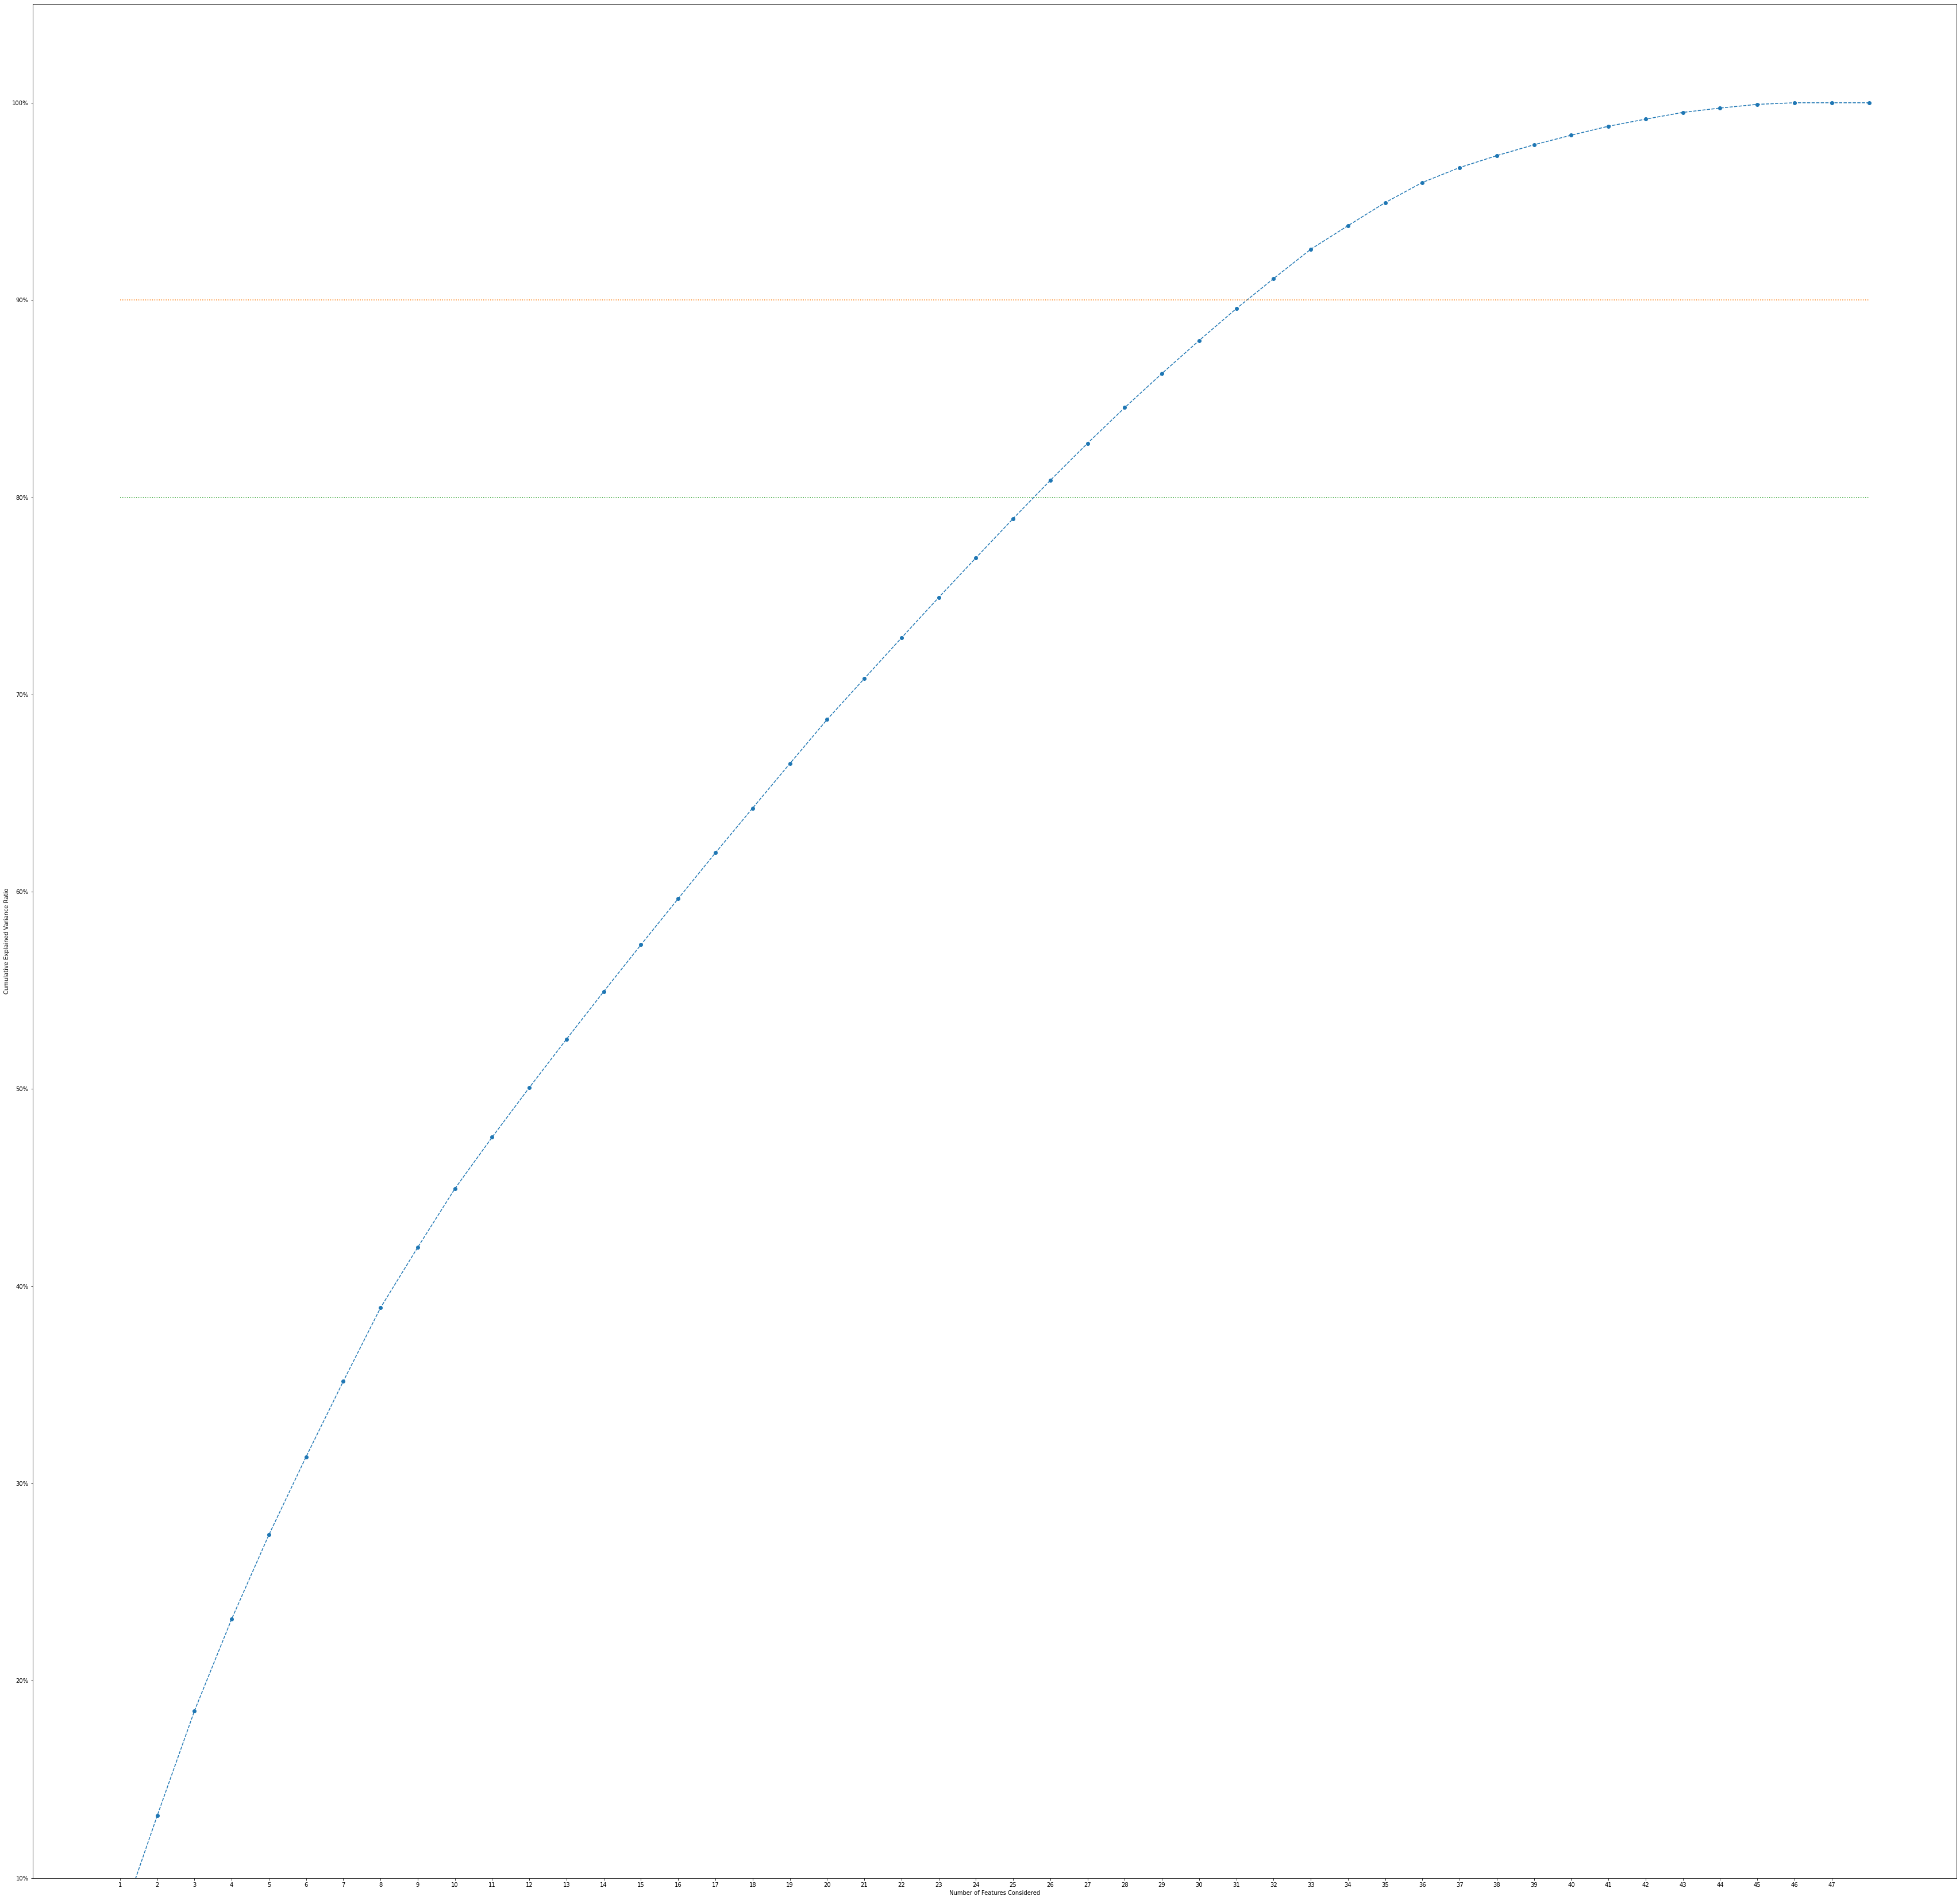

In [175]:
plt.figure(figsize=(60, 60));

plt.plot(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.1,1.1,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.1,1.1,.1)]);
plt.ylim([0.1,1.05]);
plt.plot([0,47],[.9,.9],':');
plt.plot([0,47],[.8,.8],':');
plt.xlabel("Number of Features Considered");
plt.ylabel("Cumulative Explained Variance Ratio");


In [176]:
feature_selection_pca_model = PCA(n_components=32)
fitted_model = feature_selection_pca_model.fit(X_std)

X_selected_features_pca = fitted_model.transform(np.array(X_origin_df))
print("    Explained Variance = %.3f" % fitted_model.explained_variance_ratio_.cumsum()[-1])
print("Reduced data set shape =",X_selected_features_pca.shape)

    Explained Variance = 0.911
Reduced data set shape = (160200, 32)


In [177]:
np.savetxt("PCA_origin.csv", X_selected_features_pca, delimiter=",")

In [ ]:
evaluate_base_line(df_oversampled, X_selected_features_pca, True)

In [ ]:
feature_selection_pca_model = PCA(n_components=32)
fitted_model = feature_selection_pca_model.fit(X_std)

X_selected_features_pca = fitted_model.transform(np.array(X_origin_np))
print("    Explained Variance = %.3f" % fitted_model.explained_variance_ratio_.cumsum()[-1])
print("Reduced data set shape =",X_selected_features_pca.shape)

In [ ]:
X_selected_features_pca_original = fitted_model.transform(np.array(X_origin_df))

In [ ]:
np.savetxt("PCA_origin.csv", X_selected_features_pca_original, delimiter=",")

In [ ]:
np.savetxt("PCS.csv", X_selected_features_pca, delimiter=",")

# K-Best

In [214]:
# Feature Selection
X_origin_norm = normalizer_df(X_origin_df,False,False, (0,1))
selector= SelectKBest(chi2,k=30).fit(X_origin_norm,y_origin_np)

# Get idxs of columns to keep
idxs_selected= selector.get_support(indices=True)
idxs_selected
input_variables[idxs_selected]

Index(['CELL_TYPE_Macro', 'CELL_TYPE_Tx site', 'CELL_TYPE_micro',
       'GEOGRAPHIC_CLUSTER_K_0', 'GEOGRAPHIC_CLUSTER_K_1',
       'GEOGRAPHIC_CLUSTER_K_3', 'GEOGRAPHIC_CLUSTER_K_4',
       'GEOGRAPHIC_CLUSTER_K_5', 'GEOGRAPHIC_CLUSTER_K_7',
       'GEOGRAPHIC_CLUSTER_K_8', 'GEOGRAPHIC_CLUSTER_K_9',
       'aircon_sum_wo_prev7d', 'aircon_sum_wo_prev14d',
       'ind_temperature_min_persistance_prev7d',
       'ind_temperature_mean_persistance_prev7d',
       'ind_power_min_persistance_prev7d', 'ind_power_mean_persistance_prev7d',
       'ind_ge_mean_persistance_prev7d',
       'ind_fire/smoke_min_persistance_prev7d',
       'ind_fire/smoke_mean_persistance_prev7d',
       'ind_equipment_min_persistance_prev7d',
       'ind_equipment_mean_persistance_prev7d', 'ind_min_rain_mm_prev7d',
       'ind_mean_rain_mm_prev7d', 'ind_min_temperature_prev7d',
       'aggregated_equipment_sum_alarms_prev3d',
       'aggregated_fire/smoke_sum_alarms_prev3d',
       'aggregated_ge_sum_alarms_prev3d',

In [228]:
train_data_selected=cleaned_df.loc[:,input_variables[idxs_selected]]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ind_ge_mean_persistance_prev7d', 'ind_fire/smoke_min_persistance_prev7d'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [225]:
train_data_selected.to_csv('k-best-test.csv' )

In [224]:
evaluate_base_line(concat_df_cleaned, X_selected_features_pca, True)

f1 Mean 0.992 StdDev 0.000


We can see that k-best and PCA works good with 30 features. 

# Model Evaluation 

In [178]:
train_df=pd.read_csv('train.csv')

In [179]:
# Data Frame after PCA is implememnted
PCA_arr = genfromtxt('PCA_origins.csv', delimiter=',')
X=pd.DataFrame(PCA_arr)

In [180]:
# target Variable
target_variable = 'aircon_sum_target_next14d'
y=train_df['aircon_sum_target_next14d']

Having the X and  in DataFrame platform, we split the data into train and test data set.

.

# Splitting data into Test and Train Set

In [181]:
count_class_0, count_class_1 = y.value_counts()
print(count_class_0, count_class_1)

617717 3583


In [182]:
concat_df= pd.concat([X,y], axis = 1)

In [183]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = concat_df[concat_df[target_variable]==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = concat_df[concat_df[target_variable]==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=100000,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled[target_variable].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    617717
1    100000
Name: aircon_sum_target_next14d, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split
target_variable = 'aircon_sum_target_next14d'
input_variables = df_oversampled.columns[df_oversampled.columns!=target_variable]
X_origin_df = df_oversampled[input_variables]
y_origin_df = df_oversampled[target_variable]
X_origin_df = normalizer_df(X_origin_df, True)
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_origin_df, y_origin_df, 
                                                    test_size =0.20, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(574173, 32) (143544, 32)


# Models

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_fscore_support

# GridSearch Algorithm Search 

In [42]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
parameters = {'n_estimators':[10,50,100], "criterion":  ['entropy','gini'],
              'min_samples_leaf': [10,20,100], 'random_state' : [42], 'max_depth':[5,10,15,20]}


hyperp_search(classifier,parameters)

f1_train: 0.520193 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 5, 'random_state': 42}
f1_test:  0.5391799790847788
[[123289    384]
 [ 12395   7476]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    123673
           1       0.95      0.38      0.54     19871

    accuracy                           0.91    143544
   macro avg       0.93      0.69      0.74    143544
weighted avg       0.91      0.91      0.89    143544

(0.9145309556885896, 0.9109750320459232, 0.8937569489360926, None)


# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)

f1_train: 0.556077 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.5703818336860057
[[120911   2762]
 [ 10841   9030]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    123673
           1       0.77      0.45      0.57     19871

    accuracy                           0.91    143544
   macro avg       0.84      0.72      0.76    143544
weighted avg       0.90      0.91      0.89    143544

(0.8966829040497052, 0.9052346318898735, 0.8946433594745302, None)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

hyperp_search(classifier,parameters)

# Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

f1_score:  0.38051432934209795
f1_test:  0.38051432934209795
(0.8275647575974502, 0.7682452767095803, 0.7914356698947307, None)


# AdaBoost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=3)], 'n_estimators':[50,10], 'learning_rate':[1.0,0.3,0.01]}
# AdaBoostClassifier(DecisionTreeClassifier(max_depth=3)
# base_estimator=DecisionTreeRegressor(max_depth=3)        !!!!!!!!!!


hyperp_search(classifier,parameters)

f1_train: 0.527312 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 50}
f1_test:  0.5270991647302644
[[120091   3582]
 [ 11478   8393]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    123673
           1       0.70      0.42      0.53     19871

    accuracy                           0.90    143544
   macro avg       0.81      0.70      0.73    143544
weighted avg       0.88      0.90      0.88    143544

(0.8834292320757039, 0.8950844340411303, 0.8837006818119572, None)


# Bagging Classifier


In [70]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=3)], 'n_estimators':[50,10],'bootstrap':[True, False]}

hyperp_search(classifier,parameters)

f1_train: 0.220833 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'bootstrap': True, 'n_estimators': 50}
f1_test:  0.2455111762550385
[[121998   1675]
 [ 16856   3015]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    123673
           1       0.64      0.15      0.25     19871

    accuracy                           0.87    143544
   macro avg       0.76      0.57      0.59    143544
weighted avg       0.85      0.87      0.83    143544

(0.8459712140931352, 0.8709036950342752, 0.8347394763916686, None)


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()            # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {'loss':['deviance'], 'learning_rate':[0.1,0.3],'n_estimators': [100], 'subsample':[1.0], 'criterion':['friedman_mse'], 'min_samples_split':[100, 50], 'min_samples_leaf':[10000], 'max_depth':[6,5,4,3], 'max_features':['auto']}

hyperp_search(classifier,parameters)

In [75]:
regressor.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)

f1_train: 0.313322 using {'C': 10, 'max_iter': 1000}
f1_test:  0.31203940886699505
[[122128   1545]
 [ 15912   3959]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    123673
           1       0.72      0.20      0.31     19871

    accuracy                           0.88    143544
   macro avg       0.80      0.59      0.62    143544
weighted avg       0.86      0.88      0.85    143544

(0.861827799401135, 0.8783857214512624, 0.8472955674547159, None)


# Making the Prediction

Having the model parameters and best fit model to our Train.csv Data, we will be able to predict over the Test.csv.
To be noticed, same scaled fitted model (standard Scalar) which has already implemented over the Train Data should be dedicated
toward the Test Test.

In [185]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime

In [186]:
from numpy import genfromtxt
PCA_arr = genfromtxt('PCA_origin.csv', delimiter=',')

In [187]:
test_origin = pd.read_csv('test.csv')

Having the model parameters and best fit model to our Train.csv Data, we will be able to predict over the Test.csv.
To be noticed, same scaled fitted model (standard Scalar) which has already implemented over the Train Data should be dedicated
toward the Test Test.

In [188]:
X_pca_test=pd.DataFrame(PCA_arr)
test_origin = test_origin[['SITE_ID','DATE','N_TRANSPORTED_SITES']]
# we should do all the preprocessing that we did for train.csv on the test.csv as well, The result is in the X_2 data frame

In [87]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.638963,-0.723192,1.073850,-0.020673,0.173960,-0.986872,-0.044315,-0.073762,0.318885,0.127459,...,0.228251,0.009626,0.024679,0.137854,0.068709,-0.048554,0.006412,0.025030,-0.178321,0.071160
1,-0.643231,-0.908548,1.280059,-0.098624,0.204755,-0.929311,-0.024817,-0.090516,0.362124,0.168404,...,0.249787,-0.011441,0.019608,0.166461,0.087784,-0.069482,-0.005775,0.014163,0.119573,0.014776
2,-0.630286,-1.024725,1.449132,-0.108238,0.159373,-0.975164,-0.014220,-0.097865,0.362856,0.169781,...,0.255645,-0.002174,0.017529,0.154766,0.077265,-0.049503,-0.007906,0.015206,0.299571,-0.017298
3,-0.615162,-0.894503,1.380044,-0.074874,0.003987,-1.386995,-0.097885,-0.032074,0.442236,0.228798,...,0.290155,-0.037637,0.012435,0.195928,0.110355,-0.091269,-0.026307,0.020561,0.489645,-0.063044
4,-0.622776,-1.300381,1.845811,-0.191194,0.013886,-1.246558,-0.029926,-0.086013,0.468155,0.261157,...,0.319756,-0.042134,-0.003155,0.240175,0.125228,-0.111572,-0.042119,0.016869,0.930811,-0.140841


In [88]:
test_origin.head()

,SITE_ID,DATE,N_TRANSPORTED_SITES
0,858,2019-04-10,10.0
1,858,2019-04-11,10.0
2,858,2019-04-12,10.0
3,858,2019-04-13,10.0
4,858,2019-04-14,10.0


In [189]:
test_df_concat=pd.concat([test_origin, X_pca_test], axis = 1)

In [90]:
test_df_concat.isnull().sum().sum()

0

In [190]:
####  Preprocessing of the test.csv in a exact process we did for the Train.csv 

Best_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 10, min_samples_split= 20)
Best_model.fit(X, y)

y_2_pred = Best_model.predict(X_pca_test)



In [191]:
y_prob = Best_model.predict_proba(X_pca_test)

In [194]:
np.savetxt("Prediction.csv", y_prob, delimiter=",")

### Evaluation Metrics

In [197]:

test_df_with_target = test_df_concat
test_df_with_target['aircon_sum_target_next14d']= y_2_pred

#read submission

# submission_dataset = pd.read_csv(os.path.join(dataset_dir,'submission.csv'))
submission_dataset = pd.read_csv('submission.csv')

#keep relevant cols from test set

eval_df = test_df_with_target[['SITE_ID' , 'DATE' , 'N_TRANSPORTED_SITES' , 'aircon_sum_target_next14d' ]].copy()

#merge test and submission to have N_TRANSPORTED_SITES and target

submission_dataset = submission_dataset.merge(eval_df, on=['SITE_ID' , 'DATE' ])


In [198]:
submission_dataset['aircon_sum_target_next14d'].value_counts()


0    160118
1        82
Name: aircon_sum_target_next14d, dtype: int64

In [200]:

recalls = []

#compute daily performance

for date, daily_df in submission_dataset.groupby(['DATE']):

    daily_df=daily_df.copy() 
    
    daily_df['final_prediction' ] = 0

    daily_df['NORM_N_TRANSPORTED_SITES' ] = daily_df['N_TRANSPORTED_SITES' ]/daily_df['N_TRANSPORTED_SITES' ].max()

    daily_df['weighted_prediction' ] = 0.8* daily_df['prediction'] + 0.2*daily_df['NORM_N_TRANSPORTED_SITES' ]

    daily_df = daily_df.sort_values(by=['weighted_prediction' ], ascending=False)

    daily_df = daily_df.reset_index(drop=True)

    daily_df.loc[0:10, 'final_prediction' ] = 1

    daily_recall = recall_score(y_true=daily_df['aircon_sum_target_next14d' ], y_pred=daily_df['final_prediction' ])


    recalls.append(daily_recall)

final_metric= np.mean(recalls)

print (final_metric)

/Users/tara/anaconda3/envs/data-mining-test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0
